In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from PIL import Image
# import torch
#from torchvision import transforms

drive.mount('/content/drive')

dataset_path = "/wheatmultimodaldata.csv"
image_folder = "/content/drive/MyDrive/BTP_II"

df = pd.read_csv(dataset_path, header=None)  # Loading without header

header_row_1 = df.iloc[0]
header_row_2 = df.iloc[1]

# Creating new column names by combining them
new_columns = []
for h1, h2 in zip(header_row_1, header_row_2):
    if pd.isna(h1):  # If the first header is NaN, use only the second
        new_columns.append(h2)
    else:
        new_columns.append(f"{h1} ({h2})")  # Combine them

# Set the new column names to the DataFrame and drop the original header rows
df.columns = new_columns
df = df[2:]  # Drop the first two rows

df.reset_index(drop=True, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df

,Date (nan),Plot No (nan),Fertilizer (Urea (g)),SSP (g),MoP (g),Organics (Kg),Watering (nan),Micronutrients (nan),Pesticide (nan),Plant Height (Plant 1),...,Image (nan),Stage (nan),1x1 (Total Weight),Straw Weight,Grain Weight,Unfilled Weight,Total Weight (Total Weight),Straw Weight,Grain Weight,Unfilled Weight
0,24.11.2022,1,385,1330,231,22.5,1250,0,0,0,...,NaN,NaN,599,335.2,159.6,95.2,2633.2,1239.7,819.2,466.2
1,05.12.2022,1,0,0,0,0,0,0,0,0,...,"P1_Til_Dec 5,2022_morning.jpg",Tillering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.12.2022,1,0,0,0,0,0,0,0,0,...,"P1_Til_Dec 10,2022_afternoon.jpg",Tillering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.12.2022,1,385,1330,231,22.5,1250,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27.12.2022,1,0,0,0,0,0,0,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,20.02.2023,30,0,0,0,0,0,0,0,0,...,"P30_Rip_Feb 20,2023_4.jpg",Ripening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,25.02.2023,30,0,0,0,0,0,0,0,0,...,"P30_Rip_Feb 25,2023_1.jpg",Ripening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,25.02.2023,30,0,0,0,0,0,0,0,0,...,"P30_Rip_Feb 25,2023_2.jpg",Ripening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,25.02.2023,30,0,0,0,0,0,0,0,0,...,"P30_Rip_Feb 25,2023_3.jpg",Ripening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


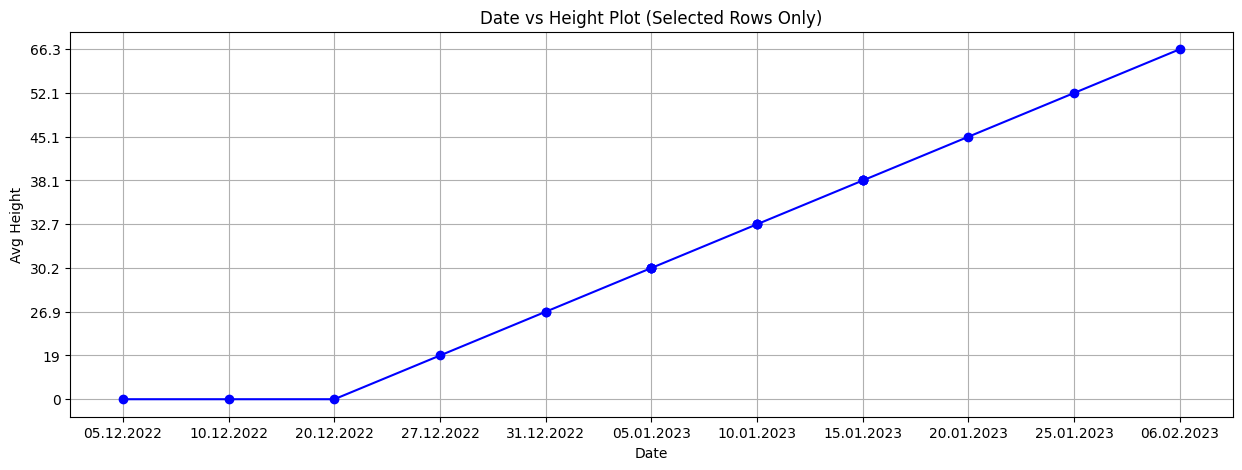

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assuming your df is already loaded

# Select the desired rows
selected_df = pd.concat([df.iloc[1:11], df.iloc[13:22], df.iloc[24:25]])

# Reset index so that the data flows continuously
selected_df = selected_df.reset_index(drop=True)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(selected_df['Date (nan)'], selected_df['avg'], marker='o', linestyle='-', color='blue')
plt.title('Date vs Height Plot (Selected Rows Only)')
plt.xlabel('Date')
plt.ylabel('Avg Height')
plt.grid(True)
plt.show()

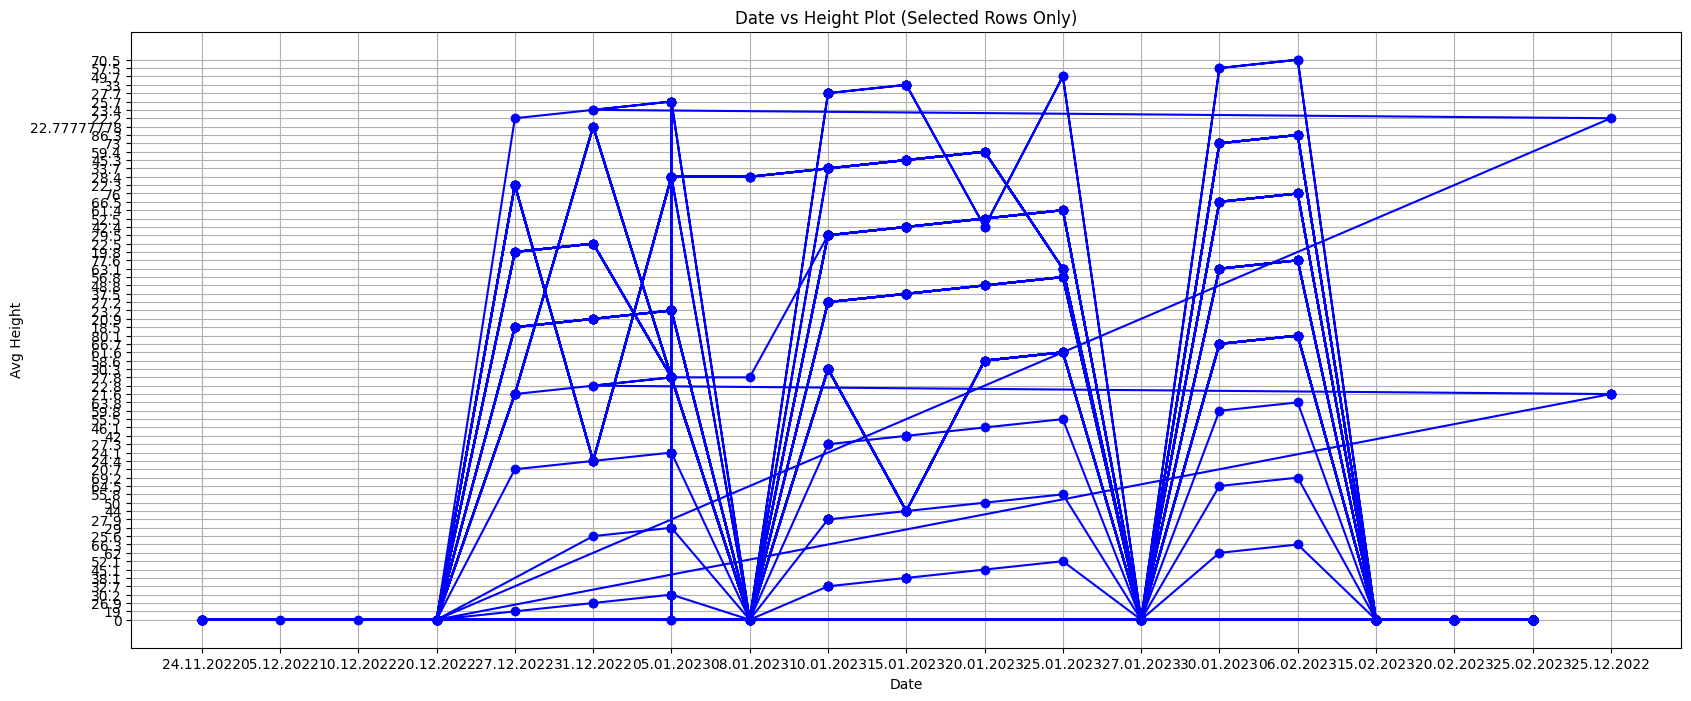

In [ ]:
# Plotting
plt.figure(figsize=(20, 8))
plt.plot(df['Date (nan)'], df['avg'], marker='o', linestyle='-', color='blue')
plt.title('Date vs Height Plot (Selected Rows Only)')
plt.xlabel('Date')
plt.ylabel('Avg Height')
plt.grid(True)
plt.show()

In [ ]:
print(df.isnull().sum())

Date (nan)                        0
Plot No (nan)                     0
Fertilizer (Urea (g))             3
SSP (g)                           0
MoP (g)                           1
Organics (Kg)                     0
Watering (nan)                    0
Micronutrients (nan)              1
Pesticide (nan)                   5
Plant Height (Plant 1)            0
Plant 2                           0
Plant 3                           0
Plant 4                           0
Plant 5                           0
Plant 6                           0
Plant 7                           0
Plant 8                           0
Plant 9                           0
Plant 10                          6
avg                               0
Biomass (Total  Height)           0
Total weight                      0
Root Height                       0
Root Weight                       0
Sweet Height                      0
Sweet Weight                      0
Tiller                            0
Image (nan)                 

In [ ]:
df.to_csv("/updated_wheatmultimodaldata.csv", index=False)

In [ ]:
df = df.drop(columns=['Date (nan)','1x1 (Total Weight)','Total Weight (Total Weight)', 'Straw Weight', 'Grain Weight', 'Unfilled Weight', 'Straw Weight', 'Grain Weight', 'Unfilled Weight'])

In [ ]:
#df = df.dropna(subset=['Image (nan)', 'Stage (nan)'])

In [ ]:
df[['Pesticide (nan)']] = df[['Pesticide (nan)']].applymap(lambda x: 1 if x == 'YES' else (0 if pd.isna(x) else x))

/tmp/ipython-input-836145971.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Pesticide (nan)']] = df[['Pesticide (nan)']].applymap(lambda x: 1 if x == 'YES' else (0 if pd.isna(x) else x))


In [ ]:
df['Micronutrients (nan)'] = pd.to_numeric(df['Micronutrients (nan)'], errors='coerce')
df['Micronutrients (nan)'] = df['Micronutrients (nan)'].fillna(df['Micronutrients (nan)'].mean())

In [ ]:
print(df.isnull().sum())

Plot No (nan)                0
Fertilizer (Urea (g))        3
SSP (g)                      0
MoP (g)                      1
Organics (Kg)                0
Watering (nan)               0
Micronutrients (nan)         0
Pesticide (nan)              0
Plant Height (Plant 1)       0
Plant 2                      0
Plant 3                      0
Plant 4                      0
Plant 5                      0
Plant 6                      0
Plant 7                      0
Plant 8                      0
Plant 9                      0
Plant 10                     6
avg                          0
Biomass (Total  Height)      0
Total weight                 0
Root Height                  0
Root Weight                  0
Sweet Height                 0
Sweet Weight                 0
Tiller                       0
Image (nan)                294
Stage (nan)                294
dtype: int64


In [ ]:
df['MoP (g)'] = pd.to_numeric(df['MoP (g)'], errors='coerce')
df['MoP (g)'] = df['MoP (g)'].fillna(df['MoP (g)'].mean())

In [ ]:
df['Fertilizer (Urea (g))'] = pd.to_numeric(df['Fertilizer (Urea (g))'], errors='coerce')
df['Fertilizer (Urea (g))'] = df['Fertilizer (Urea (g))'].fillna(df['Fertilizer (Urea (g))'].mean())

In [ ]:
df['Plant 10'] = pd.to_numeric(df['Plant 10'], errors='coerce')
df['Plant 10'] = df['Plant 10'].fillna(df['Plant 10'].mean())

In [ ]:
print(df.isnull().sum())

Plot No (nan)                0
Fertilizer (Urea (g))        0
SSP (g)                      0
MoP (g)                      0
Organics (Kg)                0
Watering (nan)               0
Micronutrients (nan)         0
Pesticide (nan)              0
Plant Height (Plant 1)       0
Plant 2                      0
Plant 3                      0
Plant 4                      0
Plant 5                      0
Plant 6                      0
Plant 7                      0
Plant 8                      0
Plant 9                      0
Plant 10                     0
avg                          0
Biomass (Total  Height)      0
Total weight                 0
Root Height                  0
Root Weight                  0
Sweet Height                 0
Sweet Weight                 0
Tiller                       0
Image (nan)                294
Stage (nan)                294
dtype: int64


In [ ]:
df.drop(columns=['Stage (nan)'], inplace=True)

In [ ]:
df

,Plot No (nan),Fertilizer (Urea (g)),SSP (g),MoP (g),Organics (Kg),Watering (nan),Micronutrients (nan),Pesticide (nan),Plant Height (Plant 1),Plant 2,...,Plant 10,avg,Biomass (Total Height),Total weight,Root Height,Root Weight,Sweet Height,Sweet Weight,Tiller,Image (nan)
0,1,385.0,1330,231.0,22.5,1250,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,NaN
1,1,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P1_Til_Dec 5,2022_morning.jpg"
2,1,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P1_Til_Dec 10,2022_afternoon.jpg"
3,1,385.0,1330,231.0,22.5,1250,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,NaN
4,1,0.0,0,0.0,0,0,0.0,0,23,19,...,10.0,19,41,0.64,10,0.08,21,0.52,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 20,2023_4.jpg"
1059,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_1.jpg"
1060,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_2.jpg"
1061,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_3.jpg"


In [ ]:
print(df.columns)

Index(['Plot No (nan)', 'Fertilizer (Urea (g))', 'SSP (g)', 'MoP (g)',
       'Organics (Kg)', 'Watering (nan)', 'Micronutrients (nan)',
       'Pesticide (nan)', 'Plant Height (Plant 1)', 'Plant 2', 'Plant 3',
       'Plant 4', 'Plant 5', 'Plant 6', 'Plant 7', 'Plant 8', 'Plant 9',
       'Plant 10', 'avg', 'Biomass (Total  Height)', 'Total weight',
       'Root Height', 'Root Weight', 'Sweet Height', 'Sweet Weight', 'Tiller',
       'Image (nan)'],
      dtype='object')


In [ ]:
from google.colab import drive
import os
import glob
import zipfile


drive.mount('/content/drive', force_remount = True)


folder_path = "/content/drive/MyDrive/BTP_II"

image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

print("Found Images:", len(image_files))

Mounted at /content/drive
Found Images: 775


In [ ]:
#!pip install diffusers[torch]

In [ ]:
#pip install diffusers transformers accelerate datasets torch torchvision numpy pandas

In [ ]:
df

,Plot No (nan),Fertilizer (Urea (g)),SSP (g),MoP (g),Organics (Kg),Watering (nan),Micronutrients (nan),Pesticide (nan),Plant Height (Plant 1),Plant 2,...,Plant 10,avg,Biomass (Total Height),Total weight,Root Height,Root Weight,Sweet Height,Sweet Weight,Tiller,Image (nan)
0,1,385.0,1330,231.0,22.5,1250,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,NaN
1,1,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P1_Til_Dec 5,2022_morning.jpg"
2,1,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P1_Til_Dec 10,2022_afternoon.jpg"
3,1,385.0,1330,231.0,22.5,1250,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,NaN
4,1,0.0,0,0.0,0,0,0.0,0,23,19,...,10.0,19,41,0.64,10,0.08,21,0.52,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 20,2023_4.jpg"
1059,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_1.jpg"
1060,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_2.jpg"
1061,30,0.0,0,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"P30_Rip_Feb 25,2023_3.jpg"


In [ ]:
print(df.columns)

Index(['Plot No (nan)', 'Fertilizer (Urea (g))', 'SSP (g)', 'MoP (g)',
       'Organics (Kg)', 'Watering (nan)', 'Micronutrients (nan)',
       'Pesticide (nan)', 'Plant Height (Plant 1)', 'Plant 2', 'Plant 3',
       'Plant 4', 'Plant 5', 'Plant 6', 'Plant 7', 'Plant 8', 'Plant 9',
       'Plant 10', 'avg', 'Biomass (Total  Height)', 'Total weight',
       'Root Height', 'Root Weight', 'Sweet Height', 'Sweet Weight', 'Tiller',
       'Image (nan)'],
      dtype='object')


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# Loading Diffusion Model

In [ ]:
import os
import pandas as pd
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionXLPipeline
from transformers import T5Tokenizer

image_dir = "/content/drive/MyDrive/BTP_II/"
save_dir = "/content/drive/MyDrive/generated_images"
os.makedirs(save_dir, exist_ok=True)

# tokenizer (FLAN-T5)
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

# Loading Stable Diffusion pipeline
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = StableDiffusionXLPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16"
).to(device)

def generate_prompt(row):

    prompt = (
        f"Generate an image of a wheat crop in a certain plot in the field in Kharagpur, West Bengal, India "
        f"on a particular day. "
        f"Plot No: {row.get('Plot No (nan)', 'unknown')}, "
        f"Fertilizer used: {row.get('Fertilizer (Urea (g))', 'unknown')}g, "
        f"SSP: {row.get('SSP (g)', 'unknown')}g, MoP: {row.get('MoP (g)', 'unknown')}g, "
        f"Organics used: {row.get('Organics (Kg)', 'unknown')}kg, "
        f"Watering: {row.get('Watering (nan)', 'unknown')}, "
        f"Plant Heights: {', '.join(str(row.get(f'Plant {i}', 'unknown')) for i in range(1, 11))}, "
        f"Micronutrients: {row.get('Micronutrients (nan)', 'unknown')}, "
        f"Pesticide: {row.get('Pesticide (nan)', 'unknown')}, "
        f"Average height: {row.get('avg', 'unknown')}, Biomass: {row.get('Biomass (Total  Height)', 'unknown')}, "
        f"Total weight: {row.get('Total weight', 'unknown')}, "
        f"Root height: {row.get('Root Height', 'unknown')}, Root weight: {row.get('Root Weight', 'unknown')}, "
        f"Sweet height: {row.get('Sweet Height', 'unknown')}, Sweet weight: {row.get('Sweet Weight', 'unknown')}, "
        f"Tiller: {row.get('Tiller', 'unknown')}. "
        f"Generate close-up and top-view images from 1.6 meters above."
    )
    return prompt

# Identifying missing images
df["Image Path"] = df["Image (nan)"].apply(lambda x: os.path.join(image_dir, x) if pd.notna(x) else None)
missing_data = df[df["Image Path"].isna()].copy()

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


# Generating Missing Images

In [ ]:
import os
import pandas as pd

def generate_and_save_images(df, pipeline, save_dir):
    new_image_paths = []

    # Count existing images in the folder
    existing_images = set(os.listdir(save_dir))

    # Iterating over only missing images
    for index, row in df[df["Image (nan)"].isna()].iterrows():
        image_name = f"generated_image_{index}.png"

        # Skip if the image already exists
        if image_name in existing_images:
            print(f"Skipping existing image: {image_name}")
            df.at[index, "Image (nan)"] = image_name  # Mark as generated
            continue

        prompt = generate_prompt(row)

        generated_image = pipeline(prompt).images[0]

        save_path = os.path.join(save_dir, image_name)
        generated_image.save(save_path)

        # Store the new image path
        new_image_paths.append(save_path)
        print(f"Image saved: {save_path}")

        # Update the dataframe with the new image path
        df.at[index, "Image (nan)"] = image_name

    return new_image_paths


save_dir = "/content/drive/MyDrive/generated_images"
os.makedirs(save_dir, exist_ok=True)

output_folder = "/content/drive/MyDrive/BTP_II"
os.makedirs(output_folder, exist_ok=True)

generated_image_paths = generate_and_save_images(df, pipeline, save_dir)

output_path = os.path.join(output_folder, "updated_dataset.csv")
df.to_csv(output_path, index=False)
print(f"Missing images generated and dataset saved successfully at: {output_path}")

In [ ]:
#import pandas as pd

#wheat_df = pd.read_csv("/updated_wheatmultimodaldata.csv")
#updated_df = pd.read_csv("/updated_dataset.csv")
#stage_column = wheat_df.pop("Stage (nan)")
#updated_df["Stage (nan)"] = stage_column
#updated_df.to_csv("/updated_wheat_dataset.csv", index=False)

# Growth Stage Prediction

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from transformers import CLIPProcessor, CLIPModel, ViTFeatureExtractor, ViTModel
from PIL import Image
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from google.colab import drive
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

drive.mount('/content/drive', force_remount=True)

SAVE_DIR = "/content/drive/MyDrive/BTP_II/training_data"
os.makedirs(SAVE_DIR, exist_ok=True)

# File paths
X_FILE = os.path.join(SAVE_DIR, "X.pt")
Y_FILE = os.path.join(SAVE_DIR, "y.pt")

dataset_path = '/updated_wheat_dataset.csv'
df = pd.read_csv(dataset_path)
df.drop(columns=['Image Path'], inplace=True)

Using device: cuda
Mounted at /content/drive


In [ ]:
df

,Plot No (nan),Fertilizer (Urea (g)),SSP (g),MoP (g),Organics (Kg),Watering (nan),Micronutrients (nan),Pesticide (nan),Plant Height (Plant 1),Plant 2,...,avg,Biomass (Total Height),Total weight,Root Height,Root Weight,Sweet Height,Sweet Weight,Tiller,Image (nan),Stage (nan)
0,1,385.0,1330,231.0,22.5,1250,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,generated_image_0.png,Tillering
1,1,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P1_Til_Dec 5,2022_morning.jpg",Tillering
2,1,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P1_Til_Dec 10,2022_afternoon.jpg",Tillering
3,1,385.0,1330,231.0,22.5,1250,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,generated_image_3.png,Tillering
4,1,0.0,0,0.0,0.0,0,0,0,23,19,...,19.0,41.0,0.64,10.0,0.08,21,0.52,1,generated_image_4.png,Heading
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 20,2023_4.jpg",Ripening
1059,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_1.jpg",Ripening
1060,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_2.jpg",Ripening
1061,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_3.jpg",Ripening


In [ ]:
def get_image_path(image_name, image_dir='/content/drive/MyDrive/BTP_II'):
    path = os.path.join(image_dir, image_name)
    return path if os.path.exists(path) else None

def create_text_prompt(row):
    return f"Generate an image of a wheat crop in Kharagpur, India on a certain day. "\
           f"Plot No: {row.get('Plot No (nan)', 'unknown')}, "\
           f"Fertilizer: {row.get('Fertilizer (Urea (g))', 'unknown')}g, "\
           f"SSP: {row.get('SSP (g)', 'unknown')}g, MoP: {row.get('MoP (g)', 'unknown')}g, "\
           f"Organics: {row.get('Organics (Kg)', 'unknown')}kg, "\
           f"Watering: {row.get('Watering (nan)', 'unknown')}, "\
           f"Plant Heights: {', '.join(str(row.get(f'Plant {i}', 'unknown')) for i in range(1, 11))}, "\
           f"Micronutrients: {row.get('Micronutrients (nan)', 'unknown')}, "\
           f"Pesticide: {row.get('Pesticide (nan)', 'unknown')}, "\
           f"Avg height: {row.get('avg', 'unknown')}, Biomass: {row.get('Biomass (Total  Height)', 'unknown')}, "\
           f"Total weight: {row.get('Total weight', 'unknown')}, "\
           f"Root height: {row.get('Root Height', 'unknown')}, Root weight: {row.get('Root Weight', 'unknown')}, "\
           f"Sweet height: {row.get('Sweet Height', 'unknown')}, Sweet weight: {row.get('Sweet Weight', 'unknown')}, "\
           f"Tiller: {row.get('Tiller', 'unknown')}. "\
           f"Generate close-up and top-view images from 1.6 meters above."

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224").to(device)
vit_processor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

def process_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = vit_processor(images=image, return_tensors="pt").to(device)
    outputs = vit_model(**inputs).last_hidden_state.mean(dim=1)
    return outputs

def process_text(text_prompt):
    inputs = clip_processor(text=[text_prompt], return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = clip_model.get_text_features(**inputs)
    return outputs

def concatenate_features(image_features, text_features):
    return torch.cat((image_features, text_features), dim=-1)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
import joblib

ENCODER_FILE = "/content/drive/MyDrive/BTP_II/label_encoder.pkl"

if os.path.exists(X_FILE) and os.path.exists(Y_FILE):
    print("Loading preprocessed data from Google Drive")
    # Load the tensor onto the CPU first, then move to device if CUDA is available
    X = torch.load(X_FILE, map_location='cpu').to(device)
    y = torch.load(Y_FILE, map_location='cpu').to(device)

    # Rebuild the label encoder (safe if class labels haven't changed)
    print("Rebuilding label encoder from non-null 'Stage (nan)' values")
    label_encoder = LabelEncoder()
    non_null_stages = df.loc[~df['Stage (nan)'].isna(), 'Stage (nan)'].values
    label_encoder.fit(non_null_stages)

    # Optional: Save the encoder now to avoid this next time
    joblib.dump(label_encoder, ENCODER_FILE)

else:
    print("Processing training data")
    X, y = [], []
    for _, row in df.iterrows():
        if not pd.isnull(row['Stage (nan)']):
            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])
            if image_path:
                image_features = process_image(image_path)
                text_features = process_text(text_prompt)
                combined_features = concatenate_features(image_features, text_features)
                X.append(combined_features.detach().squeeze(0))
                y.append(row['Stage (nan)'])

    # Converting into tensors
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = torch.tensor(y, dtype=torch.long, device=device)
    X = torch.stack(X)

    print("Saving processed training data to Google Drive")
    torch.save(X, X_FILE)
    torch.save(y, Y_FILE)

Loading preprocessed data from Google Drive
Rebuilding label encoder from non-null 'Stage (nan)' values


In [ ]:
X

tensor([[-1.1412, -0.7495,  0.7828,  ..., -0.0961, -0.0102,  0.2187],
        [-0.3110, -0.2376,  0.9412,  ..., -0.0552,  0.0847,  0.1969],
        [ 0.1043, -0.0651,  1.0842,  ..., -0.0552,  0.0847,  0.1969],
        ...,
        [-0.5425, -0.8457,  1.5087,  ..., -0.0597,  0.0583,  0.2233],
        [-0.3000, -0.6914,  0.4163,  ..., -0.0597,  0.0583,  0.2233],
        [-0.6683, -0.3995,  1.0206,  ..., -0.0597,  0.0583,  0.2233]],
       device='cuda:0')

In [ ]:
X.shape

torch.Size([772, 1280])

In [ ]:
y

tensor([3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3,
        3, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1,

# Sliding Window Approach

In [ ]:
# Sliding Window Approach
sequence_length = 5
X_seq, y_seq = [], []

for i in range(len(X) - sequence_length):
    combined_input = []
    # Include 5 previous steps: both X and y
    for j in range(sequence_length):
        x_features = X[i + j].tolist()
        y_value = [float(y[i + j])]
        combined_input.extend(x_features + y_value)

    # Add the 6th input only (no label)
    sixth_input = X[i + sequence_length].tolist()
    combined_input.extend(sixth_input)

    # Append the full sequence input and corresponding target output
    X_seq.append(torch.tensor(combined_input, dtype=torch.float))
    y_seq.append(y[i + sequence_length])

# Stack into tensors
X_seq = torch.stack(X_seq)
y_seq = torch.tensor(y_seq)

# Train-test split
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

In [ ]:
combined_input

[-0.8362411856651306,
 -0.7698096036911011,
 0.5816478133201599,
 -0.19775952398777008,
 0.10744300484657288,
 -0.8484839797019958,
 1.3419651985168457,
 0.09502691775560379,
 -1.1654143333435059,
 1.159482479095459,
 0.5739489197731018,
 -1.2213664054870605,
 -0.34564414620399475,
 1.074248194694519,
 -0.6948426365852356,
 1.1395736932754517,
 1.279906988143921,
 0.217398002743721,
 -1.315805196762085,
 -2.4761221408843994,
 0.030229011550545692,
 -0.32873037457466125,
 -0.06310620903968811,
 -0.4625408351421356,
 1.5168018341064453,
 -0.7445806860923767,
 0.1864098310470581,
 -0.6464700102806091,
 0.009977229870855808,
 -0.2702493667602539,
 -0.23486264050006866,
 -0.1742548644542694,
 -0.9796467423439026,
 0.3363681435585022,
 0.27591782808303833,
 0.4198399484157562,
 -0.3586695194244385,
 -0.20745089650154114,
 -0.15918640792369843,
 0.7390739321708679,
 0.3128111958503723,
 -0.20903421938419342,
 -0.5160301327705383,
 1.5969139337539673,
 0.16459985077381134,
 0.31618213653564453

In [ ]:
X_seq

tensor([[-1.1412, -0.7495,  0.7828,  ..., -0.0627,  0.0705,  0.2191],
        [-0.3110, -0.2376,  0.9412,  ..., -0.0627,  0.0705,  0.2191],
        [ 0.1043, -0.0651,  1.0842,  ..., -0.0631,  0.0686,  0.2285],
        ...,
        [-0.1227, -0.0934,  1.0498,  ..., -0.0597,  0.0583,  0.2233],
        [-0.7192, -0.5923,  1.1263,  ..., -0.0597,  0.0583,  0.2233],
        [-0.8362, -0.7698,  0.5816,  ..., -0.0597,  0.0583,  0.2233]])

In [ ]:
# torch.save({'X_train': X_train, 'y_train': y_train}, '/content/drive/MyDrive/BTP_II/training_data.pt')

In [ ]:
X_seq.shape

torch.Size([767, 7685])

# Training & Testing


# LSTM Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the model
class GrowthStageLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, output_size=4):
        super(GrowthStageLSTMModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss, and optimizer
model = GrowthStageLSTMModel(X_train.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10
min_delta = 1e-4
best_loss = float('inf')
counter = 0

# Lists to store loss and accuracy per epoch
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
num_epochs = 16
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train.to(device))
    loss = criterion(outputs, y_train.type(torch.long).to(device))
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Training accuracy
    with torch.no_grad():
        train_preds = torch.argmax(outputs, dim=1)
        train_acc = (train_preds == y_train.type(torch.long).to(device)).float().mean()
        train_accuracies.append(train_acc.item())

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test.to(device))
        test_loss = criterion(test_outputs, y_test.type(torch.long).to(device)).item()
        test_losses.append(test_loss)

        predictions = torch.argmax(test_outputs, dim=1)
        acc = (predictions == y_test.type(torch.long).to(device)).float().mean()
        test_accuracies.append(acc.item())

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {acc:.4f}")

    # Early stopping logic
    if best_loss - loss.item() > min_delta:
        best_loss = loss.item()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f" Early stopping at epoch {epoch+1}. No improvement in last {patience} epochs.")
            break

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test.to(device))
    final_predictions = torch.argmax(final_outputs, dim=1)
    final_acc = (final_predictions == y_test.type(torch.long).to(device)).float().mean()
    print(f"\n Final Test Accuracy after {epoch+1} epochs: {final_acc:.4f}")

Epoch [1/16] Train Loss: 1.3919, Train Acc: 0.2153, Test Loss: 1.0706, Test Acc: 0.7338
Epoch [2/16] Train Loss: 1.0801, Train Acc: 0.6917, Test Loss: 1.0161, Test Acc: 0.5779
Epoch [3/16] Train Loss: 1.0856, Train Acc: 0.5612, Test Loss: 0.7398, Test Acc: 0.7208
Epoch [4/16] Train Loss: 0.7564, Train Acc: 0.7145, Test Loss: 0.8105, Test Acc: 0.4805
Epoch [5/16] Train Loss: 0.8036, Train Acc: 0.4894, Test Loss: 0.4455, Test Acc: 0.8766
Epoch [6/16] Train Loss: 0.5426, Train Acc: 0.7928, Test Loss: 0.4192, Test Acc: 0.8766
Epoch [7/16] Train Loss: 0.5277, Train Acc: 0.8010, Test Loss: 0.4641, Test Acc: 0.8571
Epoch [8/16] Train Loss: 0.5355, Train Acc: 0.8238, Test Loss: 0.4151, Test Acc: 0.8831
Epoch [9/16] Train Loss: 0.4605, Train Acc: 0.8467, Test Loss: 0.3458, Test Acc: 0.9221
Epoch [10/16] Train Loss: 0.3968, Train Acc: 0.8695, Test Loss: 0.3437, Test Acc: 0.8961
Epoch [11/16] Train Loss: 0.4094, Train Acc: 0.8646, Test Loss: 0.3113, Test Acc: 0.9221
Epoch [12/16] Train Loss: 0.38

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test.cpu(), predictions.cpu(), digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.7059    1.0000    0.8276        24
           1     1.0000    0.8824    0.9375        51
           2     0.8600    0.9149    0.8866        47
           3     1.0000    0.7812    0.8772        32

    accuracy                         0.8896       154
   macro avg     0.8915    0.8946    0.8822       154
weighted avg     0.9114    0.8896    0.8923       154



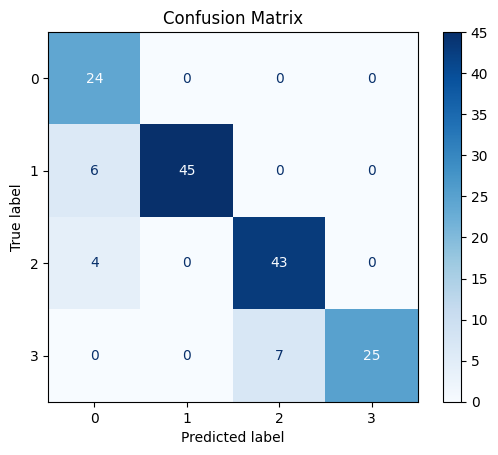

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import numpy as np

# Confusion Matrix
true_labels = y_test.cpu().numpy()
predicted_labels = final_predictions.cpu().numpy()

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

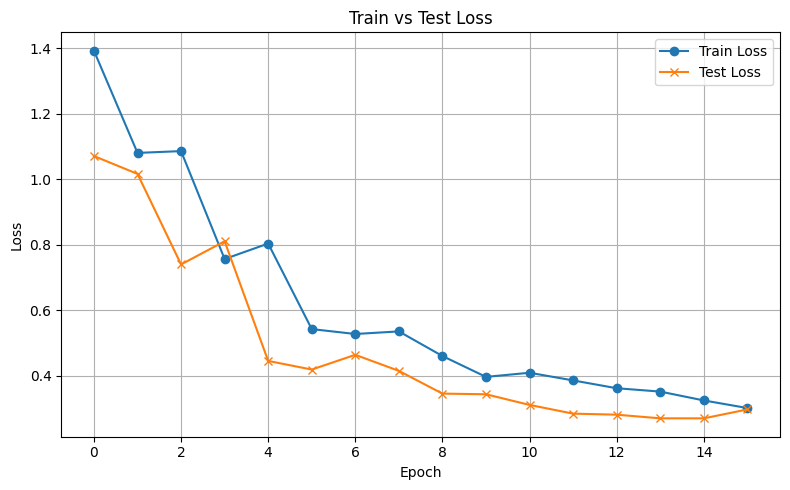

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(test_losses, label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

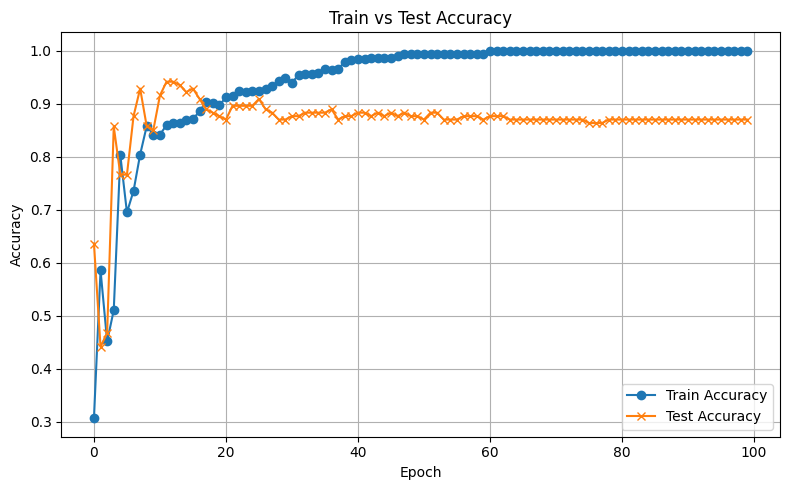

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train.shape

torch.Size([613, 7685])

In [ ]:
y_train

tensor([3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# Time Series Transformer


In [ ]:
!pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [ ]:
import torch
from tsai.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare the data
X_train_seq = X_train[:, :7680].reshape(-1, 6, 1280).permute(0, 2, 1)
X_test_seq = X_test[:, :7680].reshape(-1, 6, 1280).permute(0, 2, 1)

y_train = y_train.long()
y_test = y_test.long()

from tsai.models.TST import TST
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(X_train_seq, y_train)
test_ds = TensorDataset(X_test_seq, y_test)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)

# Model, Loss, Optimizer
model_TST = TST(c_in=1280, c_out=4, seq_len=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_TST.parameters(), lr=1e-3)

# Early stopping parameters
patience = 10
min_delta = 1e-4
best_loss = float('inf')
counter = 0

# Tracking for plotting
train_losses = []
test_accuracies = []

# Training loop
# Tracking for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model_TST.train()
    total_loss = 0
    correct_train, total_train = 0, 0

    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model_TST(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += yb.size(0)

    train_losses.append(total_loss)
    train_accuracies.append(correct_train / total_train)

    # Evaluate
    model_TST.eval()
    total_test_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_dl:
            xb, yb = xb.to(device), yb.to(device)
            out = model_TST(xb)
            loss = criterion(out, yb)
            total_test_loss += loss.item()

            preds = torch.argmax(out, dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)

    test_losses.append(total_test_loss)
    test_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}: Train Loss = {total_loss:.4f}, Train Acc = {correct_train / total_train:.4f}, Test Loss = {total_test_loss:.4f}, Test Acc = {correct / total:.4f}")

    # Early stopping logic
    if best_loss - total_loss > min_delta:
        best_loss = total_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}. No improvement in last {patience} epochs.")
            break
# Final Evaluation
model_TST.eval()
with torch.no_grad():
    final_outputs = model_TST(X_test_seq.to(device))
    final_predictions = torch.argmax(final_outputs, dim=1)
    final_acc = (final_predictions == y_test.to(device)).float().mean()
    print(f"\n Final Test Accuracy after {epoch+1} epochs: {final_acc:.4f}")

Epoch 1: Train Loss = 8.4697, Train Acc = 0.6721, Test Loss = 1.0708, Test Acc = 0.8961
Epoch 2: Train Loss = 3.9483, Train Acc = 0.8597, Test Loss = 1.0853, Test Acc = 0.8766
Epoch 3: Train Loss = 3.1040, Train Acc = 0.8777, Test Loss = 0.9196, Test Acc = 0.8961
Epoch 4: Train Loss = 2.4042, Train Acc = 0.9152, Test Loss = 0.7850, Test Acc = 0.9156
Epoch 5: Train Loss = 2.0405, Train Acc = 0.9315, Test Loss = 1.1179, Test Acc = 0.8636
Epoch 6: Train Loss = 1.3912, Train Acc = 0.9527, Test Loss = 1.2614, Test Acc = 0.8571
Epoch 7: Train Loss = 1.1785, Train Acc = 0.9608, Test Loss = 0.9614, Test Acc = 0.9026
Epoch 8: Train Loss = 0.7631, Train Acc = 0.9739, Test Loss = 1.7867, Test Acc = 0.8312
Epoch 9: Train Loss = 0.4531, Train Acc = 0.9918, Test Loss = 1.4623, Test Acc = 0.8636
Epoch 10: Train Loss = 0.3821, Train Acc = 0.9902, Test Loss = 1.3407, Test Acc = 0.8961
Epoch 11: Train Loss = 0.4388, Train Acc = 0.9902, Test Loss = 2.6773, Test Acc = 0.8831
Epoch 12: Train Loss = 0.4289,

In [ ]:
from sklearn.metrics import classification_report

# Final Evaluation
model_TST.eval()
with torch.no_grad():
    final_outputs = model_TST(X_test_seq.to(device))
    final_predictions = torch.argmax(final_outputs, dim=1).cpu()
    final_targets = y_test.cpu()
    final_acc = (final_predictions == final_targets).float().mean()
    print(f"\n Final Test Accuracy after {num_epochs} epochs: {final_acc:.4f}")

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(final_targets, final_predictions, digits=4))


 Final Test Accuracy after 100 epochs: 0.8182

 Classification Report:
              precision    recall  f1-score   support

           0     0.7407    0.8333    0.7843        24
           1     0.9762    0.8039    0.8817        51
           2     0.7667    0.9787    0.8598        47
           3     0.7600    0.5938    0.6667        32

    accuracy                         0.8182       154
   macro avg     0.8109    0.8024    0.7981       154
weighted avg     0.8306    0.8182    0.8152       154



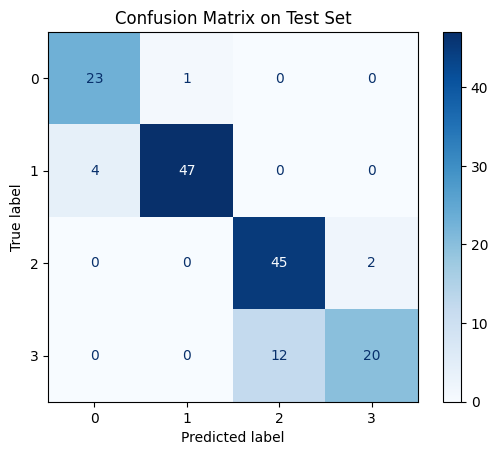

In [ ]:
# Confusion Matrix
cm = confusion_matrix(all_targets, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix on Test Set")
plt.show()

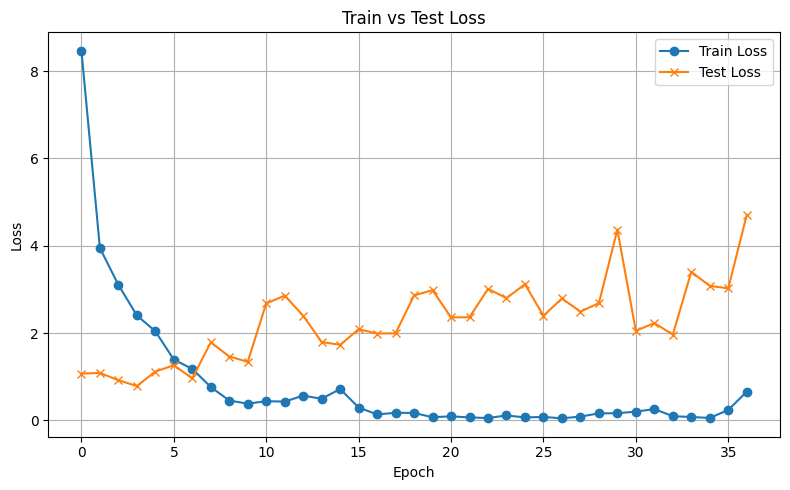

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(test_losses, label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

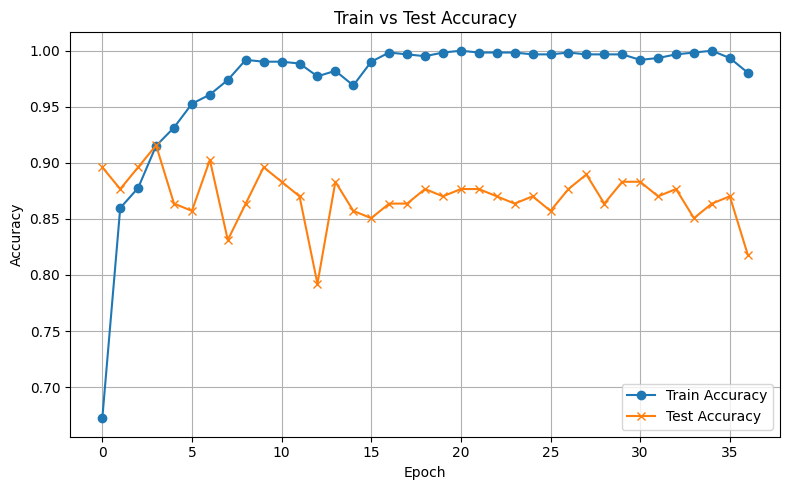

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(X_train.shape)

torch.Size([613, 7685])


# Informer

In [ ]:
pip install -U git+https://github.com/timeseriesAI/tsai.git

  Cloning https://github.com/timeseriesAI/tsai.git to /tmp/pip-req-build-tnmjti_0
  Running command git clone --filter=blob:none --quiet https://github.com/timeseriesAI/tsai.git /tmp/pip-req-build-tnmjti_0
  Resolved https://github.com/timeseriesAI/tsai.git to commit a86d8037949b223fb3210290d02e076e43084c92
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Defining Informer Components
class ProbAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.attn = nn.MultiheadAttention(d_model, n_heads, batch_first=True)

    def forward(self, x):
        attn_output, _ = self.attn(x, x, x)
        return attn_output

class InformerEncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super().__init__()
        self.attn = ProbAttention(d_model, n_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)

        self.ff = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.ReLU(),
            nn.Linear(d_model * 4, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        x2 = self.attn(x)
        x = self.norm1(x + self.dropout1(x2))
        x2 = self.ff(x)
        x = self.norm2(x + self.dropout2(x2))
        return x

class InformerClassifier(nn.Module):
    def __init__(self, c_in, seq_len, n_classes, d_model=128, n_heads=8, n_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(c_in, d_model)
        self.encoder_layers = nn.ModuleList(
            [InformerEncoderLayer(d_model, n_heads) for _ in range(n_layers)]
        )
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Linear(d_model, n_classes)

    def forward(self, x):  # x: [B, C, T]
        x = x.permute(0, 2, 1)  # [B, T, C]
        x = self.input_proj(x)  # [B, T, d_model]
        for layer in self.encoder_layers:
            x = layer(x)
        x = x.permute(0, 2, 1)  # [B, d_model, T]
        x = self.pool(x).squeeze(-1)  # [B, d_model]
        return self.classifier(x)  # [B, n_classes]

X_train_seq = X_train[:, :7680].reshape(-1, 6, 1280).permute(0, 2, 1)
X_test_seq = X_test[:, :7680].reshape(-1, 6, 1280).permute(0, 2, 1)

y_train = y_train.long()
y_test = y_test.long()

train_ds = TensorDataset(X_train_seq, y_train)
test_ds = TensorDataset(X_test_seq, y_test)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_INF = InformerClassifier(c_in=1280, seq_len=6, n_classes=4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_INF.parameters(), lr=1e-3)

num_epochs = 10
patience = 10
min_delta = 1e-4
best_loss = float('inf')
counter = 0

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model_INF.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model_INF(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += yb.size(0)

    train_acc = correct_train / total_train
    train_losses.append(total_loss)
    train_accuracies.append(train_acc)

    #Evaluation
    model_INF.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for xb, yb in test_dl:
            xb, yb = xb.to(device), yb.to(device)
            out = model_INF(xb)
            loss = criterion(out, yb)
            test_loss += loss.item()

            preds = torch.argmax(out, dim=1)
            correct_test += (preds == yb).sum().item()
            total_test += yb.size(0)

    test_acc = correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}: Train Loss = {total_loss:.4f}, Train Acc = {train_acc:.4f}, Test Loss = {test_loss:.4f}, Test Acc = {test_acc:.4f}")

    # Early stopping
    if best_loss - test_loss > min_delta:
        best_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Final Evaluation
model_INF.eval()
with torch.no_grad():
    final_outputs = model_INF(X_test_seq.to(device))
    final_preds = torch.argmax(final_outputs, dim=1)
    final_acc = (final_preds == y_test.to(device)).float().mean()
    print(f"\nFinal Test Accuracy: {final_acc:.4f}")

Epoch 1: Train Loss = 9.5525, Train Acc = 0.5856, Test Loss = 1.3106, Test Acc = 0.8312
Epoch 2: Train Loss = 4.5309, Train Acc = 0.8222, Test Loss = 0.8454, Test Acc = 0.9286
Epoch 3: Train Loss = 3.7141, Train Acc = 0.8581, Test Loss = 1.0761, Test Acc = 0.8571
Epoch 4: Train Loss = 3.0785, Train Acc = 0.8858, Test Loss = 0.7746, Test Acc = 0.9221
Epoch 5: Train Loss = 2.5522, Train Acc = 0.8923, Test Loss = 1.2131, Test Acc = 0.8701
Epoch 6: Train Loss = 2.4552, Train Acc = 0.8989, Test Loss = 0.8492, Test Acc = 0.8701
Epoch 7: Train Loss = 1.6303, Train Acc = 0.9380, Test Loss = 1.0134, Test Acc = 0.8701
Epoch 8: Train Loss = 0.9260, Train Acc = 0.9723, Test Loss = 1.5698, Test Acc = 0.8182
Epoch 9: Train Loss = 1.1874, Train Acc = 0.9625, Test Loss = 1.8051, Test Acc = 0.9026
Epoch 10: Train Loss = 1.4403, Train Acc = 0.9396, Test Loss = 1.8447, Test Acc = 0.9091

Final Test Accuracy: 0.9091


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

model_INF.eval()
with torch.no_grad():
    final_outputs = model_INF(X_test_seq.to(device))
    final_preds = torch.argmax(final_outputs, dim=1).cpu()
    true_labels = y_test.cpu()

    report = classification_report(true_labels, final_preds, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("\nClassification Report:\n")
    print(classification_report(true_labels, final_preds))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.89      0.98      0.93        51
           2       0.79      0.94      0.85        47
           3       0.91      0.62      0.74        32

    accuracy                           0.86       154
   macro avg       0.87      0.82      0.84       154
weighted avg       0.86      0.86      0.85       154



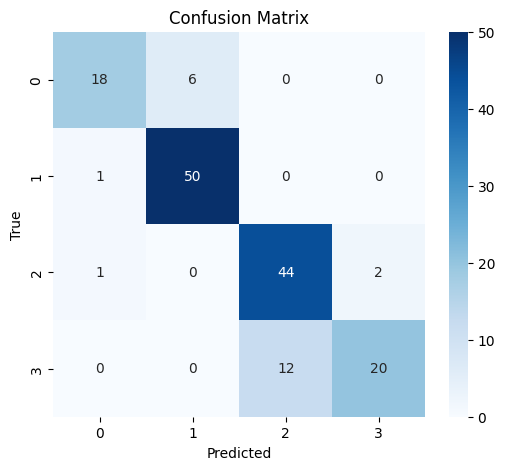

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

model_INF.eval()
with torch.no_grad():
    final_outputs = model_INF(X_test_seq.to(device))
    final_preds = torch.argmax(final_outputs, dim=1).cpu()
    true_labels = y_test.cpu()

    cm = confusion_matrix(true_labels, final_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

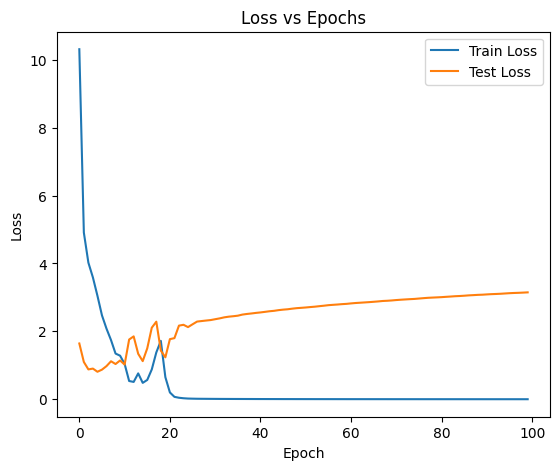

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

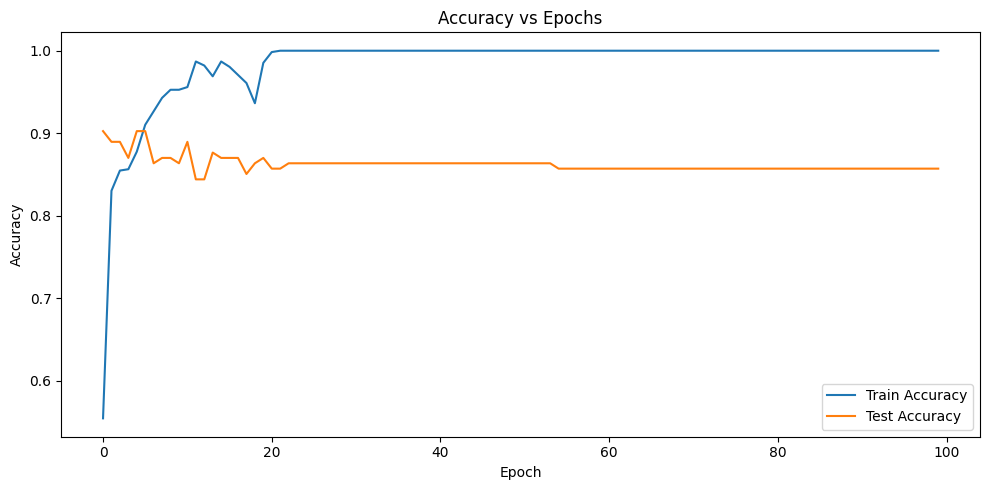

In [ ]:
# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Bahdanau Attention Mechanism


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepareing sequence input [B, 1280, 6] => [B, 6, 1280]
X_train_seq = X_train[:, :7680].reshape(-1, 6, 1280).to(device)
X_test_seq = X_test[:, :7680].reshape(-1, 6, 1280).to(device)

y_train = y_train.long().to(device)
y_test = y_test.long().to(device)

train_ds = TensorDataset(X_train_seq, y_train)
test_ds = TensorDataset(X_test_seq, y_test)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)


# Bahdanau Attention
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.W1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.W2 = nn.Linear(hidden_dim, 1)

    def forward(self, encoder_outputs):
        # encoder_outputs: [B, T, 2H]
        score = torch.tanh(self.W1(encoder_outputs))   # [B, T, H]
        attention_weights = F.softmax(self.W2(score), dim=1)  # [B, T, 1]
        context_vector = torch.sum(attention_weights * encoder_outputs, dim=1)  # [B, 2H]
        return context_vector, attention_weights


# Complete Model
class LSTMWithAttention(nn.Module):
    def __init__(self, input_dim=1280, hidden_dim=256, num_classes=4):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.attention = BahdanauAttention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):  # x: [B, T, D]
        lstm_out, _ = self.lstm(x)   # [B, T, 2H]
        context, attn_weights = self.attention(lstm_out)  # [B, 2H]
        output = self.fc(context)  # [B, num_classes]
        return output

model_BAM = LSTMWithAttention().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_BAM.parameters(), lr=1e-3)

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
best_loss = float('inf')
counter, patience = 0, 10
num_epochs = 100

for epoch in range(num_epochs):
    model_BAM.train()
    running_loss, correct_train, total_train = 0, 0, 0
    for xb, yb in train_dl:
        optimizer.zero_grad()
        out = model_BAM(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(out, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += yb.size(0)

    train_loss = running_loss
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluatation
    model_BAM.eval()
    correct_test, total_test, test_loss = 0, 0, 0
    with torch.no_grad():
        for xb, yb in test_dl:
            out = model_BAM(xb)
            loss = criterion(out, yb)
            test_loss += loss.item()

            preds = torch.argmax(out, dim=1)
            correct_test += (preds == yb).sum().item()
            total_test += yb.size(0)

    test_losses.append(test_loss)
    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Test Loss = {test_loss:.4f}, Test Acc = {test_acc:.4f}")

    # Early stopping
    if best_loss - test_loss > 1e-4:
        best_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Final Evaluation
model_BAM.eval()
with torch.no_grad():
    final_outputs = model_BAM(X_test_seq)
    final_predictions = torch.argmax(final_outputs, dim=1)
    final_acc = (final_predictions == y_test).float().mean()
    print(f"\nFinal Test Accuracy after {epoch+1} epochs: {final_acc:.4f}")

Epoch 1: Train Loss = 9.7587, Train Acc = 0.5922, Test Loss = 1.2670, Test Acc = 0.9026
Epoch 2: Train Loss = 3.9327, Train Acc = 0.8581, Test Loss = 0.6376, Test Acc = 0.9156
Epoch 3: Train Loss = 2.9278, Train Acc = 0.8874, Test Loss = 0.9084, Test Acc = 0.8636
Epoch 4: Train Loss = 2.2277, Train Acc = 0.9168, Test Loss = 0.9441, Test Acc = 0.8571
Epoch 5: Train Loss = 1.8147, Train Acc = 0.9315, Test Loss = 1.0509, Test Acc = 0.8442
Epoch 6: Train Loss = 1.5110, Train Acc = 0.9511, Test Loss = 0.8641, Test Acc = 0.9156
Epoch 7: Train Loss = 1.4730, Train Acc = 0.9462, Test Loss = 0.9544, Test Acc = 0.9026
Epoch 8: Train Loss = 1.0716, Train Acc = 0.9576, Test Loss = 0.8028, Test Acc = 0.8896
Epoch 9: Train Loss = 0.5120, Train Acc = 0.9886, Test Loss = 0.8525, Test Acc = 0.8961
Epoch 10: Train Loss = 0.2426, Train Acc = 0.9984, Test Loss = 1.2998, Test Acc = 0.8961
Epoch 11: Train Loss = 0.1281, Train Acc = 0.9984, Test Loss = 1.0854, Test Acc = 0.8961
Epoch 12: Train Loss = 0.0752,


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.96      0.98        51
           2       0.79      0.96      0.87        47
           3       0.91      0.62      0.74        32

    accuracy                           0.90       154
   macro avg       0.91      0.89      0.89       154
weighted avg       0.90      0.90      0.89       154



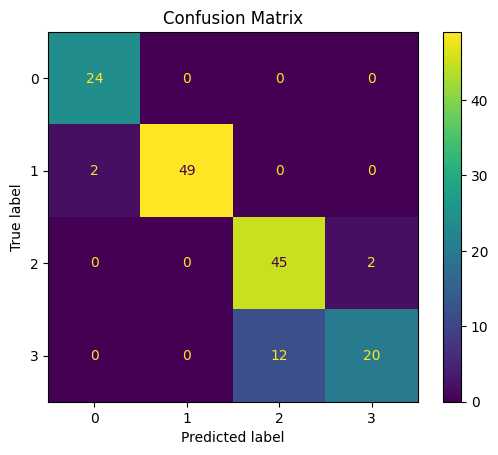

In [ ]:
# Confusion Matrix & Classification Report
y_true = y_test.cpu()
y_pred = final_predictions.cpu()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

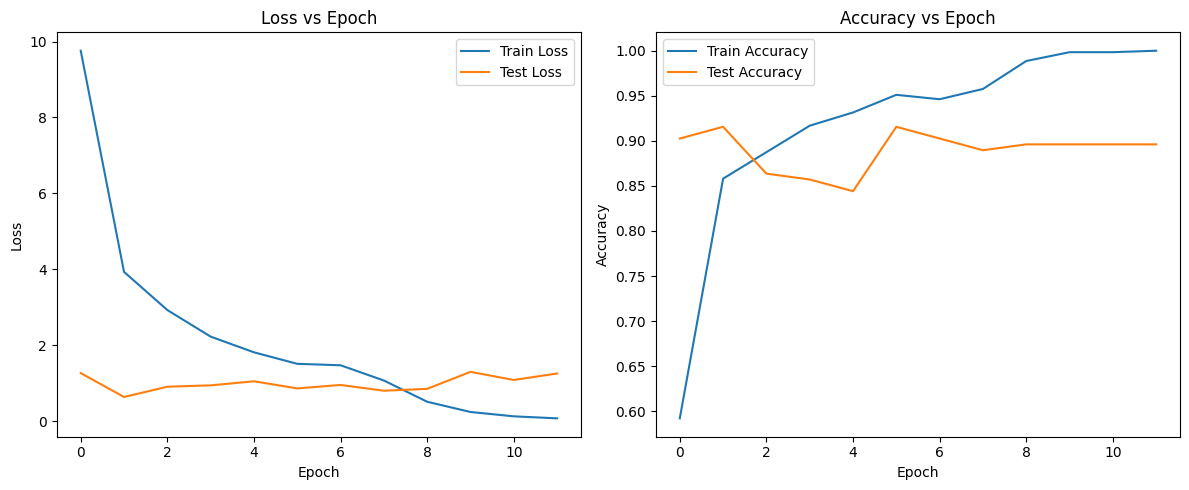

In [ ]:
# Accuracy and Loss Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df

,Plot No (nan),Fertilizer (Urea (g)),SSP (g),MoP (g),Organics (Kg),Watering (nan),Micronutrients (nan),Pesticide (nan),Plant Height (Plant 1),Plant 2,...,avg,Biomass (Total Height),Total weight,Root Height,Root Weight,Sweet Height,Sweet Weight,Tiller,Image (nan),Stage (nan)
0,1,385.0,1330,231.0,22.5,1250,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,generated_image_0.png,Tillering
1,1,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P1_Til_Dec 5,2022_morning.jpg",Tillering
2,1,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P1_Til_Dec 10,2022_afternoon.jpg",Tillering
3,1,385.0,1330,231.0,22.5,1250,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,generated_image_3.png,Tillering
4,1,0.0,0,0.0,0.0,0,0,0,23,19,...,19.0,41.0,0.64,10.0,0.08,21,0.52,1,generated_image_4.png,Heading
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 20,2023_4.jpg",Ripening
1059,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_1.jpg",Ripening
1060,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_2.jpg",Ripening
1061,30,0.0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.00,0.0,0.00,0,0.00,0,"P30_Rip_Feb 25,2023_3.jpg",Ripening


# Luong Attention Mechanism

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare sequence input [B, 1280, 6] → [B, 6, 1280]
X_train_seq = X_train[:, :7680].reshape(-1, 6, 1280).to(device)
X_test_seq = X_test[:, :7680].reshape(-1, 6, 1280).to(device)

y_train = y_train.long().to(device)
y_test = y_test.long().to(device)

train_ds = TensorDataset(X_train_seq, y_train)
test_ds = TensorDataset(X_test_seq, y_test)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)


# Luong Attention
class LuongAttention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim * 2)  # general score function

    def forward(self, encoder_outputs, final_hidden):
        # encoder_outputs: [B, T, 2H]
        # final_hidden: [B, 2H]
        scores = torch.bmm(encoder_outputs, final_hidden.unsqueeze(2)).squeeze(2)  # [B, T]
        attn_weights = F.softmax(scores, dim=1)  # [B, T]
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # [B, 2H]
        return context, attn_weights


# Model Definition
class LSTMLuongAttentionClassifier(nn.Module):
    def __init__(self, input_dim=1280, hidden_dim=256, num_classes=4):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.attention = LuongAttention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):  # x: [B, T, D]
        lstm_out, (hn, _) = self.lstm(x)  # lstm_out: [B, T, 2H], hn: [2, B, H]
        final_hidden = torch.cat((hn[0], hn[1]), dim=1)  # [B, 2H]
        context, attn_weights = self.attention(lstm_out, final_hidden)  # [B, 2H]
        output = self.fc(context)  # [B, num_classes]
        return output


# Initialize model
model_LAM = LSTMLuongAttentionClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LAM.parameters(), lr=1e-3)

# Training setup
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
best_loss = float('inf')
counter, patience = 0, 10
num_epochs = 17

for epoch in range(num_epochs):
    model_LAM.train()
    total_loss, correct_train, total_train = 0, 0, 0
    for xb, yb in train_dl:
        optimizer.zero_grad()
        out = model_LAM(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(out, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += yb.size(0)

    train_loss = total_loss
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluation
    model_LAM.eval()
    total_test_loss, correct_test, total_test = 0, 0, 0
    with torch.no_grad():
        for xb, yb in test_dl:
            out = model_LAM(xb)
            loss = criterion(out, yb)
            total_test_loss += loss.item()
            preds = torch.argmax(out, dim=1)
            correct_test += (preds == yb).sum().item()
            total_test += yb.size(0)

    test_losses.append(total_test_loss)
    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Test Loss = {total_test_loss:.4f}, Test Acc = {test_acc:.4f}")

    # Early stopping
    if best_loss - total_test_loss > 1e-4:
        best_loss = total_test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Final Evaluation
model_LAM.eval()
with torch.no_grad():
    final_outputs = model_LAM(X_test_seq)
    final_predictions = torch.argmax(final_outputs, dim=1)
    final_acc = (final_predictions == y_test).float().mean()
    print(f"\nFinal Test Accuracy after {epoch+1} epochs: {final_acc:.4f}")

Epoch 1: Train Loss = 10.4150, Train Acc = 0.5237, Test Loss = 1.6331, Test Acc = 0.7792
Epoch 2: Train Loss = 5.7037, Train Acc = 0.7830, Test Loss = 1.1655, Test Acc = 0.9026
Epoch 3: Train Loss = 3.5720, Train Acc = 0.8695, Test Loss = 1.0004, Test Acc = 0.8701
Epoch 4: Train Loss = 3.0427, Train Acc = 0.8760, Test Loss = 0.6705, Test Acc = 0.9026
Epoch 5: Train Loss = 2.6150, Train Acc = 0.9054, Test Loss = 0.8142, Test Acc = 0.8831
Epoch 6: Train Loss = 2.4661, Train Acc = 0.9152, Test Loss = 1.0990, Test Acc = 0.8377
Epoch 7: Train Loss = 1.7185, Train Acc = 0.9445, Test Loss = 0.9467, Test Acc = 0.8896
Epoch 8: Train Loss = 1.6053, Train Acc = 0.9527, Test Loss = 0.8941, Test Acc = 0.8636
Epoch 9: Train Loss = 1.7059, Train Acc = 0.9315, Test Loss = 0.9752, Test Acc = 0.8636
Epoch 10: Train Loss = 1.3820, Train Acc = 0.9511, Test Loss = 0.7933, Test Acc = 0.8766
Epoch 11: Train Loss = 1.1833, Train Acc = 0.9527, Test Loss = 0.7842, Test Acc = 0.8896
Epoch 12: Train Loss = 0.8456

In [ ]:
# Confusion Matrix & Classification Report
y_true = y_test.cpu()
y_pred = final_predictions.cpu()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.92      0.96        51
           2       0.84      0.81      0.83        47
           3       0.74      0.78      0.76        32

    accuracy                           0.87       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.88      0.87      0.87       154



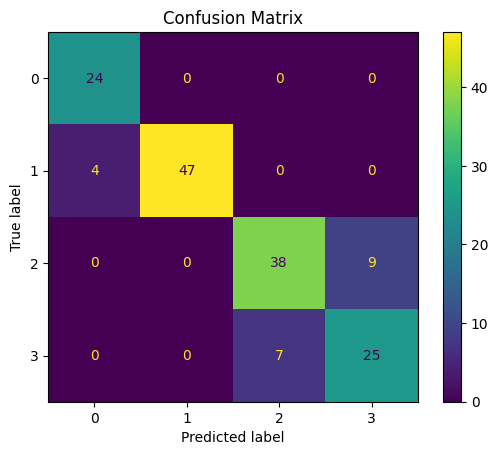

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

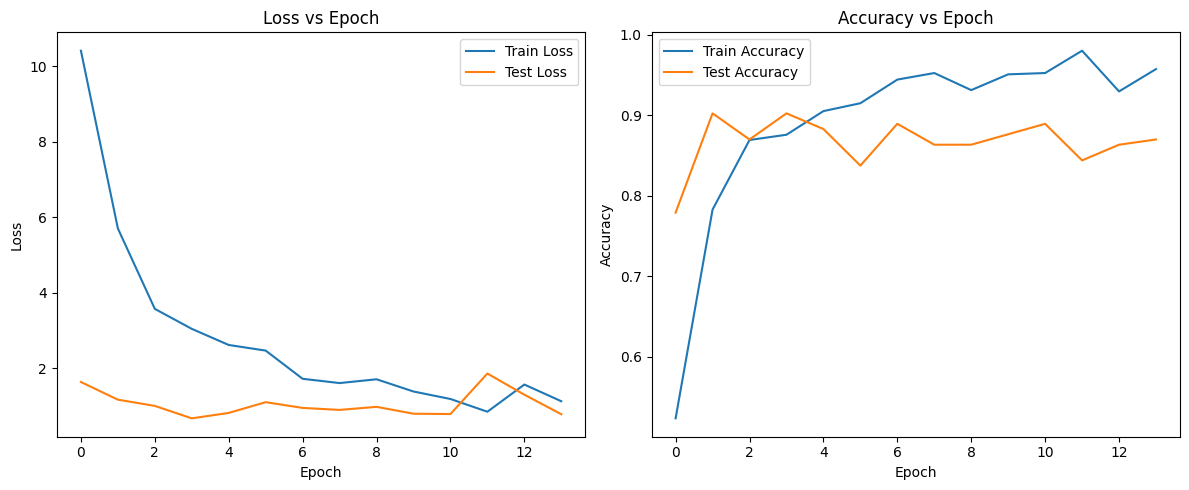

In [ ]:
# Accuracy and Loss Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

plt.tight_layout()
plt.show()

# Prediction Using LSTM



In [ ]:
print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

# Loop until all missing values are filled
while pd.isnull(df['Stage (nan)']).any():
    changes_made = False  # Track if we filled any missing value in this pass

    for i in range(len(df)):
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            if pd.isnull(stage):
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([encoded_y], dtype=torch.float).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave X and Y like: [X[0], y[0], X[1], y[1], ..., X[4], y[4]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = model(input_tensor.unsqueeze(0).to(device))  # Shape: [1, dim]
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True  # We filled one, keep the loop going

    if not changes_made:
        print("No further predictions could be made. Some sequences may not be predictable.")
        break


Starting sequential prediction...


In [ ]:
final_dataset_file = "/content/drive/MyDrive/final_wheat_dataset_Time_Series.csv"

df.to_csv(final_dataset_file, index=False)
print(f"\nFinal dataset with predicted growth stages saved to: {final_dataset_file}")


Final dataset with predicted growth stages saved to: /content/drive/MyDrive/final_wheat_dataset_Time_Series.csv


# Prediction Using Time Series Transformer

In [ ]:
print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

# Loop until all missing values are filled
while pd.isnull(df['Stage (nan)']).any():
    changes_made = False  # Track if we filled any missing value in this pass

    for i in range(len(df)):
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            if pd.isnull(stage):
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([encoded_y], dtype=torch.float).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave X and Y like: [X[0], y[0], X[1], y[1], ..., X[4], y[4]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = TST(input_tensor.unsqueeze(0).to(device))  # Shape: [1, dim]
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True  # We filled one, keep the loop going

    if not changes_made:
        print("No further predictions could be made. Some sequences may not be predictable.")
        break

In [ ]:
final_dataset_file = "/content/drive/MyDrive/final_wheat_dataset_Time_Series_TST.csv"

df.to_csv(final_dataset_file, index=False)
print(f"\nFinal dataset with predicted growth stages saved to: {final_dataset_file}")

# Prediction Using Informer

In [ ]:
print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

# Loop until all missing values are filled
while pd.isnull(df['Stage (nan)']).any():
    changes_made = False  # Track if we filled any missing value in this pass

    for i in range(len(df)):
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            if pd.isnull(stage):
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([encoded_y], dtype=torch.float).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave X and Y like: [X[0], y[0], X[1], y[1], ..., X[4], y[4]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = INF(input_tensor.unsqueeze(0).to(device))  # Shape: [1, dim]
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True  # We filled one, keep the loop going

    if not changes_made:
        print("No further predictions could be made. Some sequences may not be predictable.")
        break

In [ ]:
final_dataset_file = "/content/drive/MyDrive/final_wheat_dataset_Time_Series_INF.csv"

df.to_csv(final_dataset_file, index=False)
print(f"\nFinal dataset with predicted growth stages saved to: {final_dataset_file}")

# Prediction Using BAM

In [ ]:
print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

# Loop until all missing values are filled
while pd.isnull(df['Stage (nan)']).any():
    changes_made = False  # Track if we filled any missing value in this pass

    for i in range(len(df)):
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            if pd.isnull(stage):
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([encoded_y], dtype=torch.float).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave X and Y like: [X[0], y[0], X[1], y[1], ..., X[4], y[4]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = BAM(input_tensor.unsqueeze(0).to(device))  # Shape: [1, dim]
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True  # We filled one, keep the loop going

    if not changes_made:
        print("No further predictions could be made. Some sequences may not be predictable.")
        break

In [ ]:
final_dataset_file = "/content/drive/MyDrive/final_wheat_dataset_Time_Series_BAM.csv"

df.to_csv(final_dataset_file, index=False)
print(f"\nFinal dataset with predicted growth stages saved to: {final_dataset_file}")

# Prediction Using LAM

In [ ]:
print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

# Loop until all missing values are filled
while pd.isnull(df['Stage (nan)']).any():
    changes_made = False  # Track if we filled any missing value in this pass

    for i in range(len(df)):
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            if pd.isnull(stage):
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([encoded_y], dtype=torch.float).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave X and Y like: [X[0], y[0], X[1], y[1], ..., X[4], y[4]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = LAM(input_tensor.unsqueeze(0).to(device))  # Shape: [1, dim]
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True  # We filled one, keep the loop going

    if not changes_made:
        print("No further predictions could be made. Some sequences may not be predictable.")
        break

In [ ]:
final_dataset_file = "/content/drive/MyDrive/final_wheat_dataset_Time_Series_LAM.csv"

df.to_csv(final_dataset_file, index=False)
print(f"\nFinal dataset with predicted growth stages saved to: {final_dataset_file}")

# Validating Using LSTM


In [ ]:
import pandas as pd

df = pd.read_csv('/final_wheat_dataset_Time_Series.csv')

In [ ]:
import random
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Backup ground-truth labels
original_labels = df['Stage (nan)'].copy()

# Step 2: Randomly mask 20% of labels (excluding first 6 rows)
mask = df['Stage (nan)'].notnull()  # only valid labels
valid_indices = df[mask].index[df.index >= 6]  # skip first 6 rows
indices = valid_indices.to_series().sample(frac=0.2, random_state=42).index  # 20% random

# Mask the selected rows
df.loc[indices, 'Stage (nan)'] = np.nan

print(f"Masked {len(indices)} labels for validation (skipping first 6 rows).")

# -------------------------------
#  Run your sequential prediction loop here
# -------------------------------

Masked 211 labels for validation (skipping first 6 rows).


In [ ]:
print(df.head(10))

   Plot No (nan)  Fertilizer (Urea (g))  SSP (g)  MoP (g)  Organics (Kg)  \
0              1                  385.0     1330    231.0           22.5   
1              1                    0.0        0      0.0            0.0   
2              1                    0.0        0      0.0            0.0   
3              1                  385.0     1330    231.0           22.5   
4              1                    0.0        0      0.0            0.0   
5              1                    0.0        0      0.0            0.0   
6              1                    0.0        0      0.0            0.0   
7              1                    0.0        0      0.0            0.0   
8              1                    0.0        0      0.0            0.0   
9              1                    0.0        0      0.0            0.0   

   Watering (nan)  Micronutrients (nan)  Pesticide (nan)  \
0            1250                     0                0   
1               0                     0    

In [ ]:
import joblib

ENCODER_FILE = "/content/drive/MyDrive/BTP_II/label_encoder.pkl"

if os.path.exists(X_FILE) and os.path.exists(Y_FILE):
    print("Loading preprocessed data from Google Drive")
    # Load the tensor onto the CPU first, then move to device if CUDA is available
    X = torch.load(X_FILE, map_location='cpu').to(device)
    y = torch.load(Y_FILE, map_location='cpu').to(device)

    # Rebuild the label encoder (safe if class labels haven't changed)
    print("Rebuilding label encoder from non-null 'Stage (nan)' values")
    label_encoder = LabelEncoder()
    non_null_stages = df.loc[~df['Stage (nan)'].isna(), 'Stage (nan)'].values
    label_encoder.fit(non_null_stages)

    # Optional: Save the encoder now to avoid this next time
    joblib.dump(label_encoder, ENCODER_FILE)

else:
    print("Processing training data")
    X, y = [], []
    for _, row in df.iterrows():
        if not pd.isnull(row['Stage (nan)']):
            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])
            if image_path:
                image_features = process_image(image_path)
                text_features = process_text(text_prompt)
                combined_features = concatenate_features(image_features, text_features)
                X.append(combined_features.detach().squeeze(0))
                y.append(row['Stage (nan)'])

    # Converting into tensors
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = torch.tensor(y, dtype=torch.long, device=device)
    X = torch.stack(X)

    print("Saving processed training data to Google Drive")
    torch.save(X, X_FILE)
    torch.save(y, Y_FILE)

Loading preprocessed data from Google Drive
Rebuilding label encoder from non-null 'Stage (nan)' values


In [ ]:
# Sliding Window Approach
sequence_length = 5
X_seq, y_seq = [], []

for i in range(len(X) - sequence_length):
    combined_input = []
    # Include 5 previous steps: both X and y
    for j in range(sequence_length):
        x_features = X[i + j].tolist()
        y_value = [float(y[i + j])]
        combined_input.extend(x_features + y_value)

    # Add the 6th input only (no label)
    sixth_input = X[i + sequence_length].tolist()
    combined_input.extend(sixth_input)

    # Append the full sequence input and corresponding target output
    X_seq.append(torch.tensor(combined_input, dtype=torch.float))
    y_seq.append(y[i + sequence_length])

# Stack into tensors
X_seq = torch.stack(X_seq)
y_seq = torch.tensor(y_seq)

# Train-test split
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Backup ground-truth labels
original_labels = df['Stage (nan)'].copy()

# Step 2: Randomly mask 20% of labels
mask = df['Stage (nan)'].notnull()
indices = df[mask].sample(frac=0.2, random_state=42).index
df.loc[indices, 'Stage (nan)'] = np.nan  # delete labels for validation

print(f"Masked {len(indices)} labels for validation.")

# -------------------------------
#  Run your sequential prediction loop here
# (the same code you pasted)
# -------------------------------

print("\nStarting sequential prediction...")
final_stages = df['Stage (nan)'].tolist()
predicted_y = []

while pd.isnull(df['Stage (nan)']).any():
    changes_made = False

    for i in range(len(df)):
        # Only predict if this row is NaN
        if i < sequence_length or not pd.isnull(df.at[i, 'Stage (nan)']):
            continue

        x_window, y_window = [], []
        valid = True

        # Build the sliding window from previous sequence_length rows
        for j in range(i - sequence_length, i):
            row = df.iloc[j]
            stage = df.at[j, 'Stage (nan)']

            # Skip if the stage is still NaN or empty
            if pd.isnull(stage) or stage == '':
                valid = False
                break

            text_prompt = create_text_prompt(row)
            image_path = get_image_path(row['Image (nan)'])

            if not image_path:
                valid = False
                break

            image_features = process_image(image_path)
            text_features = process_text(text_prompt)
            combined = concatenate_features(image_features, text_features).detach().squeeze(0).to(device)
            x_window.append(combined)

            # Encode Y (stage label)
            encoded_y = label_encoder.transform([stage])[0] if isinstance(stage, str) else stage
            y_tensor = torch.tensor([float(encoded_y)]).to(device)
            y_window.append(y_tensor)

        if valid and len(x_window) == sequence_length:
            # Interleave [X[0], y[0], X[1], y[1], ..., X[n], y[n]]
            interleaved_input = []
            for x, y in zip(x_window, y_window):
                interleaved_input.append(x)
                interleaved_input.append(y)

            # Features of the current row (only X, since Y is missing)
            current_row = df.iloc[i]
            current_text_prompt = create_text_prompt(current_row)
            current_image_path = get_image_path(current_row['Image (nan)'])

            if not current_image_path:
                valid = False
                continue

            current_image_features = process_image(current_image_path)
            current_text_features = process_text(current_text_prompt)
            current_combined_features = concatenate_features(current_image_features, current_text_features).detach().squeeze(0).to(device)

            interleaved_input.append(current_combined_features)

            # Flatten + predict
            input_tensor = torch.cat(interleaved_input).flatten()

            with torch.no_grad():
                output = model(input_tensor.unsqueeze(0).to(device))
                predicted_idx = torch.argmax(output).item()
                predicted_stage = label_encoder.inverse_transform([predicted_idx])[0]

                # Only update if NaN
                df.at[i, 'Stage (nan)'] = predicted_stage
                predicted_y.append(predicted_idx)
                changes_made = True

    if not changes_made:
        print("No further predictions could be made.")
        break


# Step 3: Collect predictions only for masked indices
true_labels = original_labels.loc[indices].astype(str)
predicted_labels = df.loc[indices, 'Stage (nan)'].astype(str)

# Filter out 'nan' predictions and their corresponding true labels
valid_predictions_mask = predicted_labels != 'nan'
true_labels_filtered = true_labels[valid_predictions_mask]
predicted_labels_filtered = predicted_labels[valid_predictions_mask]


# Step 4: Evaluate
accuracy = accuracy_score(true_labels_filtered, predicted_labels_filtered)
cm = confusion_matrix(true_labels_filtered, predicted_labels_filtered, labels=label_encoder.classes_.astype(str))
report = classification_report(true_labels_filtered, predicted_labels_filtered, target_names=label_encoder.classes_.astype(str))

print("\n Validation Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Masked 170 labels for validation.

Starting sequential prediction...

 Validation Results:
Accuracy: 0.6882

Confusion Matrix:
[[21 10  1  3]
 [ 0 29  0  1]
 [ 3  0 35  5]
 [ 8 16  6 32]]

Classification Report:
                precision    recall  f1-score   support

       Heading       0.66      0.60      0.63        35
      Ripening       0.53      0.97      0.68        30
Stem Extension       0.83      0.81      0.82        43
     Tillering       0.78      0.52      0.62        62

      accuracy                           0.69       170
     macro avg       0.70      0.72      0.69       170
  weighted avg       0.72      0.69      0.68       170



In [ ]:
print("\nClassification Report:")
print(report)


Classification Report:
                precision    recall  f1-score   support

       Heading       0.66      0.60      0.63        35
      Ripening       0.53      0.97      0.68        30
Stem Extension       0.83      0.81      0.82        43
     Tillering       0.78      0.52      0.62        62

      accuracy                           0.69       170
     macro avg       0.70      0.72      0.69       170
  weighted avg       0.72      0.69      0.68       170



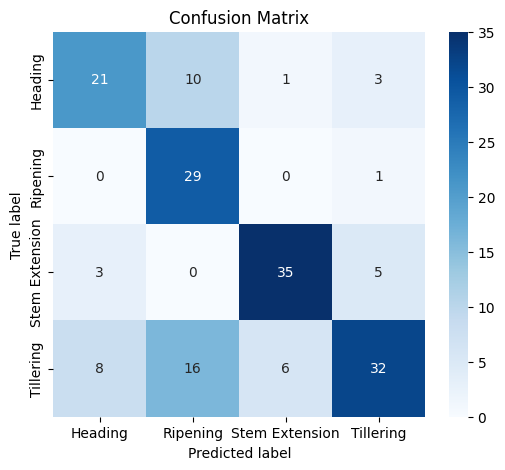

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix (numeric)
cm = confusion_matrix(true_labels_filtered, predicted_labels_filtered,
                      labels=label_encoder.classes_.astype(str))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_.astype(str),
            yticklabels=label_encoder.classes_.astype(str))

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# MMBERT ImageEmbeddings

In [ ]:
#@title MM BertEncoder

class MultimodalBertEncoder(nn.Module):
    def __init__(self, args):
        super(MultimodalBertEncoder, self).__init__()
        self.args = args
        bert = BertModel.from_pretrained(args.bert_model)
        self.txt_embeddings = bert.embeddings

        if args.task == "vsnli":
            ternary_embeds = nn.Embedding(3, args.hidden_sz)
            ternary_embeds.weight.data[:2].copy_(
                bert.embeddings.token_type_embeddings.weight
            )
            ternary_embeds.weight.data[2].copy_(
                bert.embeddings.token_type_embeddings.weight.data.mean(dim=0)
            )
            self.txt_embeddings.token_type_embeddings = ternary_embeds

        self.img_embeddings = ImageBertEmbeddings(args, self.txt_embeddings)
        self.img_encoder = ImageEncoder(args)
        self.encoder = bert.encoder
        self.pooler = bert.pooler
        self.clf = nn.Linear(args.hidden_sz, args.n_classes)

    def forward(self, input_txt, attention_mask, segment, input_img):
        bsz = input_txt.size(0)
        attention_mask = torch.cat(
            [
                torch.ones(bsz, self.args.num_image_embeds + 2).long().cuda(),
                attention_mask,
            ],
            dim=1,
        )
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)
        extended_attention_mask = extended_attention_mask.to(
            dtype=next(self.parameters()).dtype
        )
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        img_tok = (
            torch.LongTensor(input_txt.size(0), self.args.num_image_embeds + 2)
            .fill_(0)
            .cuda()
        )
        img = self.img_encoder(input_img)  # BxNx3x224x224 -> BxNx2048
        img_embed_out = self.img_embeddings(img, img_tok)
        txt_embed_out = self.txt_embeddings(input_txt, segment)

        encoder_input = torch.cat([img_embed_out, txt_embed_out], 1)  # Bx(TEXT+IMG)xHID

        encoded_layers = self.encoder(
            encoder_input, extended_attention_mask, output_all_encoded_layers=False
        )

        return self.pooler(encoded_layers[-1])


In [ ]:
#@title MultiModal BERT Classifier Layer

class MultimodalBertClf(nn.Module):
    def __init__(self, args):
        super(MultimodalBertClf, self).__init__()
        self.args = args
        self.enc = MultimodalBertEncoder(args)
        self.clf = nn.Linear(args.hidden_sz, args.n_classes)

    def forward(self, txt, mask, segment, img):
        x = self.enc(txt, mask, segment, img)
        return self.clf(x)


--------------------------------------------------------------------------------

##Helper Functions

In [ ]:
#@title criterion
def get_criterion(args):
    if args.task_type == "multilabel":
        if args.weight_classes:
            freqs = [args.label_freqs[l] for l in args.labels]
            label_weights = (torch.FloatTensor(freqs) / args.train_data_len) ** -1
            criterion = nn.BCEWithLogitsLoss(pos_weight=label_weights.cuda())
        else:
            criterion = nn.BCEWithLogitsLoss()
    else:
        criterion = nn.CrossEntropyLoss()

    return criterion

In [ ]:
#@title Bert Optimizer

import torch.nn as nn
import torch.optim as optim
from pytorch_pretrained_bert import BertAdam

def get_optimizer(model, args):
    if args.model in ["bert", "concatbert", "mmbt"]:
        total_steps = (
            args.train_data_len
            / args.batch_sz
            / args.gradient_accumulation_steps
            * args.max_epochs
        )
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {"params": [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], "weight_decay": 0.01},
            {"params": [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], "weight_decay": 0.0,},
        ]
        optimizer = BertAdam(
            optimizer_grouped_parameters,
            lr=args.lr,
            warmup=args.warmup,
            t_total=total_steps,
        )
    else:
        optimizer = optim.Adam(model.parameters(), lr=args.lr)

    return optimizer




In [ ]:
#@title scheduler
def get_scheduler(optimizer, args):
    return optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, "max", patience=args.lr_patience, verbose=True, factor=args.lr_factor
    )

In [ ]:
#@title loggers

import logging
import time
from datetime import timedelta


class LogFormatter:
    def __init__(self):
        self.start_time = time.time()

    def format(self, record):
        elapsed_seconds = round(record.created - self.start_time)

        prefix = "%s - %s - %s" % (
            record.levelname,
            time.strftime("%x %X"),
            timedelta(seconds=elapsed_seconds),
        )
        message = record.getMessage()
        message = message.replace("\n", "\n" + " " * (len(prefix) + 3))
        return "%s - %s" % (prefix, message)


def create_logger(filepath, args):
    # create log formatter
    log_formatter = LogFormatter()

    # create file handler and set level to debug
    file_handler = logging.FileHandler(filepath, "a")
    file_handler.setLevel(logging.DEBUG)
    file_handler.setFormatter(log_formatter)

    # create console handler and set level to info
    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.INFO)
    console_handler.setFormatter(log_formatter)

    # create logger and set level to debug
    logger = logging.getLogger()
    logger.handlers = []
    logger.setLevel(logging.DEBUG)
    logger.propagate = False
    logger.addHandler(file_handler)
    logger.addHandler(console_handler)

    # reset logger elapsed time
    def reset_time():
        log_formatter.start_time = time.time()

    logger.reset_time = reset_time

    logger.info(
        "\n".join(
            "%s: %s" % (k, str(v))
            for k, v in sorted(dict(vars(args)).items(), key=lambda x: x[0])
        )
    )

    return logger

In [ ]:
# @title Helper Functions:
#@markdown get_data_loaders()
#

import functools
import json
import os
from collections import Counter

import torch
import torchvision.transforms as transforms
from pytorch_pretrained_bert import BertTokenizer
from torch.utils.data import DataLoader

import json
import numpy as np
import os
from PIL import Image

import torch
from torch.utils.data import Dataset


import contextlib
import numpy as np
import random
import shutil
import os

import torch


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


def save_checkpoint(state, is_best, checkpoint_path, filename="checkpoint.pt"):
    filename = os.path.join(checkpoint_path, filename)
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, os.path.join(checkpoint_path, "model_best.pt"))


def load_checkpoint(model, path):
    best_checkpoint = torch.load(path)
    model.load_state_dict(best_checkpoint["state_dict"])


def truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length.
    Copied from https://github.com/huggingface/pytorch-pretrained-BERT
    """
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


def store_preds_to_disk(tgts, preds, args):
    if args.task_type == "multilabel":
        with open(os.path.join(args.savedir, "test_labels_pred.txt"), "w") as fw:
            fw.write(
                "\n".join([" ".join(["1" if x else "0" for x in p]) for p in preds])
            )
        with open(os.path.join(args.savedir, "test_labels_gold.txt"), "w") as fw:
            fw.write(
                "\n".join([" ".join(["1" if x else "0" for x in t]) for t in tgts])
            )
        with open(os.path.join(args.savedir, "test_labels.txt"), "w") as fw:
            fw.write(" ".join([l for l in args.labels]))

    else:
        with open(os.path.join(args.savedir, "test_labels_pred.txt"), "w") as fw:
            fw.write("\n".join([str(x) for x in preds]))
        with open(os.path.join(args.savedir, "test_labels_gold.txt"), "w") as fw:
            fw.write("\n".join([str(x) for x in tgts]))
        with open(os.path.join(args.savedir, "test_labels.txt"), "w") as fw:
            fw.write(" ".join([str(l) for l in args.labels]))


def log_metrics(set_name, metrics, args, logger):
    if args.task_type == "multilabel":
        logger.info(
            "{}: Loss: {:.5f} | Macro F1 {:.5f} | Micro F1: {:.5f}".format(
                set_name, metrics["loss"], metrics["macro_f1"], metrics["micro_f1"]
            )
        )
    else:
        logger.info(
            "{}: Loss: {:.5f} | Acc: {:.5f}".format(
                set_name, metrics["loss"], metrics["acc"]
            )
        )


@contextlib.contextmanager
def numpy_seed(seed, *addl_seeds):
    """Context manager which seeds the NumPy PRNG with the specified seed and
    restores the state afterward"""
    if seed is None:
        yield
        return
    if len(addl_seeds) > 0:
        seed = int(hash((seed, *addl_seeds)) % 1e6)
    state = np.random.get_state()
    np.random.seed(seed)
    try:
        yield
    finally:
        np.random.set_state(state)


class JsonlDataset(Dataset):
    def __init__(self, data_path, tokenizer, transforms, vocab, args):
        self.data = [json.loads(l) for l in open(data_path)]
        self.data_dir = os.path.dirname(data_path)
        self.tokenizer = tokenizer
        self.args = args
        self.vocab = vocab
        self.n_classes = len(args.labels)
        self.text_start_token = ["[CLS]"] if args.model != "mmbt" else ["[SEP]"]

        with numpy_seed(0):
            for row in self.data:
                if np.random.random() < args.drop_img_percent:
                    row["img"] = None

        self.max_seq_len = args.max_seq_len
        if args.model == "mmbt":
            self.max_seq_len -= args.num_image_embeds

        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if self.args.task == "vsnli":
            sent1 = self.tokenizer(self.data[index]["sentence1"])
            sent2 = self.tokenizer(self.data[index]["sentence2"])
            truncate_seq_pair(sent1, sent2, self.args.max_seq_len - 3)
            sentence = self.text_start_token + sent1 + ["[SEP]"] + sent2 + ["[SEP]"]
            segment = torch.cat(
                [torch.zeros(2 + len(sent1)), torch.ones(len(sent2) + 1)]
            )
        else:
            sentence = (
                self.text_start_token
                + self.tokenizer(self.data[index]["text"])[
                    : (self.args.max_seq_len - 1)
                ]
            )
            segment = torch.zeros(len(sentence))

        sentence = torch.LongTensor(
            [
                self.vocab.stoi[w] if w in self.vocab.stoi else self.vocab.stoi["[UNK]"]
                for w in sentence
            ]
        )

        if self.args.task_type == "multilabel":
            label = torch.zeros(self.n_classes)
            label[
                [self.args.labels.index(tgt) for tgt in self.data[index]["label"]]
            ] = 1
        else:
            label = torch.LongTensor(
                [self.args.labels.index(self.data[index]["label"])]
            )

        image = None
        stage_map = {
            "Tillering": 1,
            "Stem Extension": 2,
            "Heading": 3,
            "Ripening": 4
        }
        if self.args.model in ["img", "concatbow", "concatbert", "mmbt"]:
            plot_number = self.data[index]["Plot No"]
            stage = self.data[index]["label"]
            stage_number = stage_map.get(stage, 0)

            # Ensure this is part of your dataset initialization
            if self.data[index]["img"]:
                folder_name = f"PLOT {plot_number}/{stage_number}_{stage}"
                img_filename = self.data[index]["img"]
                img_path = os.path.join('/content/drive/MyDrive/wheat_classification', folder_name, img_filename)

                try:
                    image = Image.open(img_path).convert("RGB")
                except FileNotFoundError:
                    image = Image.fromarray(128 * np.ones((224, 224, 3), dtype=np.uint8))
            image = self.transforms(image)

        if self.args.model == "mmbt":
            # The first SEP is part of Image Token.
            segment = segment[1:]
            sentence = sentence[1:]
            # The first segment (0) is of images.
            segment += 1

        return sentence, segment, image, label



class Vocab(object):
    def __init__(self, emptyInit=False):
        if emptyInit:
            self.stoi, self.itos, self.vocab_sz = {}, [], 0
        else:
            self.stoi = {
                w: i
                for i, w in enumerate(["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"])
            }
            self.itos = [w for w in self.stoi]
            self.vocab_sz = len(self.itos)

    def add(self, words):
        cnt = len(self.itos)
        for w in words:
            if w in self.stoi:
                continue
            self.stoi[w] = cnt
            self.itos.append(w)
            cnt += 1
        self.vocab_sz = len(self.itos)


def get_transforms(args):
    return transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.46777044, 0.44531429, 0.40661017],
                std=[0.12221994, 0.12145835, 0.14380469],
            ),
        ]
    )


def get_labels_and_frequencies(path):
    label_freqs = Counter()
    data_labels = [json.loads(line)["label"] for line in open(path)]
    if type(data_labels[0]) == list:
        for label_row in data_labels:
            label_freqs.update(label_row)
    else:
        label_freqs.update(data_labels)

    return list(label_freqs.keys()), label_freqs


def get_glove_words(path):
    word_list = []
    for line in open(path):
        w, _ = line.split(" ", 1)
        word_list.append(w)
    return word_list


def get_vocab(args):
    vocab = Vocab()
    if args.model in ["bert", "mmbt", "concatbert"]:
        bert_tokenizer = BertTokenizer.from_pretrained(
            args.bert_model, do_lower_case=True
        )
        vocab.stoi = bert_tokenizer.vocab
        vocab.itos = bert_tokenizer.ids_to_tokens
        vocab.vocab_sz = len(vocab.itos)

    else:
        word_list = get_glove_words(args.glove_path)
        vocab.add(word_list)

    return vocab


def collate_fn(batch, args):
    lens = [len(row[0]) for row in batch]
    bsz, max_seq_len = len(batch), max(lens)

    mask_tensor = torch.zeros(bsz, max_seq_len).long()
    text_tensor = torch.zeros(bsz, max_seq_len).long()
    segment_tensor = torch.zeros(bsz, max_seq_len).long()

    img_tensor = None
    if args.model in ["img", "concatbow", "concatbert", "mmbt"]:
        img_tensor = torch.stack([row[2] for row in batch])

    if args.task_type == "multilabel":
        # Multilabel case
        tgt_tensor = torch.stack([row[3] for row in batch])
    else:
        # Single Label case
        tgt_tensor = torch.cat([row[3] for row in batch]).long()

    for i_batch, (input_row, length) in enumerate(zip(batch, lens)):
        tokens, segment = input_row[:2]
        text_tensor[i_batch, :length] = tokens
        segment_tensor[i_batch, :length] = segment
        mask_tensor[i_batch, :length] = 1

    return text_tensor, segment_tensor, mask_tensor, img_tensor, tgt_tensor


def get_data_loaders(args):
    tokenizer = (
        BertTokenizer.from_pretrained(args.bert_model, do_lower_case=True).tokenize
        if args.model in ["bert", "mmbt", "concatbert"]
        else str.split
    )

    transforms = get_transforms(args)

    # Get labels and vocab
    args.labels, args.label_freqs = get_labels_and_frequencies(
        os.path.join(args.data_path, "train.jsonl")
    )
    vocab = get_vocab(args)
    args.vocab = vocab
    args.vocab_sz = vocab.vocab_sz
    args.n_classes = len(args.labels)

    # Load training dataset
    train = JsonlDataset(
        os.path.join(args.data_path, "train.jsonl"),
        tokenizer,
        transforms,
        vocab,
        args,
    )
    args.train_data_len = len(train)

    # Load validation dataset
    dev = JsonlDataset(
        os.path.join(args.data_path, "dev.jsonl"),
        tokenizer,
        transforms,
        vocab,
        args,
    )

    # Load test dataset
    test_set = JsonlDataset(
        os.path.join(args.data_path, "test.jsonl"),
        tokenizer,
        transforms,
        vocab,
        args,
    )

    # Define collate function
    collate = functools.partial(collate_fn, args=args)

    # DataLoader for training
    train_loader = DataLoader(
        train,
        batch_size=args.batch_sz,
        shuffle=True,
        num_workers=args.n_workers,
        collate_fn=collate,
    )

    # DataLoader for validation
    val_loader = DataLoader(
        dev,
        batch_size=args.batch_sz,
        shuffle=False,
        num_workers=args.n_workers,
        collate_fn=collate,
    )

    # DataLoader for testing
    test_loader = DataLoader(
        test_set,
        batch_size=args.batch_sz,
        shuffle=False,
        num_workers=args.n_workers,
        collate_fn=collate,
    )

    # Return the data loaders
    return train_loader, val_loader, {"test": test_loader}



In [ ]:
#@title model forward during training

def model_forward(i_epoch, model, args, criterion, batch):
    txt, segment, mask, img, tgt = batch

    freeze_img = i_epoch < args.freeze_img
    freeze_txt = i_epoch < args.freeze_txt

    if args.model == "bow":
        txt = txt.cuda()
        out = model(txt)
    elif args.model == "img":
        img = img.cuda()
        out = model(img)
    elif args.model == "concatbow":
        txt, img = txt.cuda(), img.cuda()
        out = model(txt, img)
    elif args.model == "bert":
        txt, mask, segment = txt.cuda(), mask.cuda(), segment.cuda()
        out = model(txt, mask, segment)
    elif args.model == "concatbert":
        txt, img = txt.cuda(), img.cuda()
        mask, segment = mask.cuda(), segment.cuda()
        out = model(txt, mask, segment, img)
    else:
        assert args.model == "mmbt"
        for param in model.enc.img_encoder.parameters():
            param.requires_grad = not freeze_img
        for param in model.enc.encoder.parameters():
            param.requires_grad = not freeze_txt

        txt, img = txt.cuda(), img.cuda()
        mask, segment = mask.cuda(), segment.cuda()
        out = model(txt, mask, segment, img)

    tgt = tgt.cuda()
    loss = criterion(out, tgt)
    return loss, out, tgt


--------------------------------------------------------------------------------

# Training

Example:


```
python mmbt/train.py --batch_sz 4 --gradient_accumulation_steps 40 \
 --savedir /path/to/savedir/ --name mmbt_model_run \
 --data_path /path/to/datasets/ \
 --task food101 --task_type classification \
 --model mmbt --num_image_embeds 3 --freeze_txt 5 --freeze_img 3  \
 --patience 5 --dropout 0.1 --lr 5e-05 --warmup 0.1 --max_epochs 100 --seed 1
```


These are the parametres you should tinker with when making you own model.



In [ ]:
#@title model_eval()

from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm

def model_eval(i_epoch, data, model, args, criterion, store_preds=False):
    with torch.no_grad():
        losses, preds, tgts = [], [], []
        for batch in data:
            loss, out, tgt = model_forward(i_epoch, model, args, criterion, batch)
            losses.append(loss.item())

            if args.task_type == "multilabel":
                pred = torch.sigmoid(out).cpu().detach().numpy() > 0.5
            else:
                pred = torch.nn.functional.softmax(out, dim=1).argmax(dim=1).cpu().detach().numpy()

            preds.append(pred)
            tgt = tgt.cpu().detach().numpy()
            tgts.append(tgt)

    metrics = {"loss": np.mean(losses)}
    if args.task_type == "multilabel":
        tgts = np.vstack(tgts)
        preds = np.vstack(preds)
        metrics["macro_f1"] = f1_score(tgts, preds, average="macro")
        metrics["micro_f1"] = f1_score(tgts, preds, average="micro")
    else:
        tgts = [l for sl in tgts for l in sl]
        preds = [l for sl in preds for l in sl]
        metrics["acc"] = accuracy_score(tgts, preds)

    if store_preds:
        store_preds_to_disk(tgts, preds, args)

    return metrics

In [ ]:
def get_model(args):
    return MultimodalBertClf(args)

In [ ]:
#@title train function

from tqdm import tqdm

def train(args):

    set_seed(args.seed)
    args.savedir = os.path.join(args.savedir, args.name)
    os.makedirs(args.savedir, exist_ok=True)

    train_loader, val_loader, test_loaders = get_data_loaders(args)

    model = get_model(args)
    criterion = get_criterion(args) #criteria for loss
    optimizer = get_optimizer(model, args) #adam optimizer
    scheduler = get_scheduler(optimizer, args) #Scheduler

    logger = create_logger("%s/logfile.log" % args.savedir, args)
    logger.info(model)
    model.cuda()

    torch.save(args, os.path.join(args.savedir, "args.pt"))

    start_epoch, global_step, n_no_improve, best_metric = 0, 0, 0, -np.inf

    if os.path.exists(os.path.join(args.savedir, "checkpoint.pt")):
        checkpoint = torch.load(os.path.join(args.savedir, "checkpoint.pt"))
        start_epoch = checkpoint["epoch"]
        n_no_improve = checkpoint["n_no_improve"]
        best_metric = checkpoint["best_metric"]
        model.load_state_dict(checkpoint["state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer"])
        scheduler.load_state_dict(checkpoint["scheduler"])

    logger.info("Training..")

    for i_epoch in tqdm( range(start_epoch, args.max_epochs) ):
        train_losses = []
        model.train()
        optimizer.zero_grad()

        for batch in tqdm(train_loader, total=len(train_loader)):
            loss, _, _ = model_forward(i_epoch, model, args, criterion, batch)
            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            train_losses.append(loss.item())
            loss.backward()
            global_step += 1
            if global_step % args.gradient_accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

        model.eval()
        metrics = model_eval(i_epoch, val_loader, model, args, criterion)
        logger.info("Train Loss: {:.4f}".format(np.mean(train_losses)))
        log_metrics("Val", metrics, args, logger)

        tuning_metric = (
            metrics["micro_f1"] if args.task_type == "multilabel" else metrics["acc"]
        )
        scheduler.step(tuning_metric)
        is_improvement = tuning_metric > best_metric
        if is_improvement:
            best_metric = tuning_metric
            n_no_improve = 0
        else:
            n_no_improve += 1

        save_checkpoint(
            {
                "epoch": i_epoch + 1,
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "n_no_improve": n_no_improve,
                "best_metric": best_metric,
            },
            is_improvement,
            args.savedir,
        )

        if n_no_improve >= args.patience:
            logger.info("No improvement. Breaking out of loop.")
            break

    load_checkpoint(model, os.path.join(args.savedir, "model_best.pt"))
    model.eval()
    for test_name, test_loader in test_loaders.items():
        test_metrics = model_eval(
            np.inf, test_loader, model, args, criterion, store_preds=True
        )
        log_metrics(f"Test - {test_name}", test_metrics, args, logger)


In [ ]:
#@title Arguments
#@markdown this is where you change your HyperParametres
import argparse

parser = argparse.ArgumentParser(description="Train Models")

parser.add_argument("--batch_sz", type=int, default=8)
parser.add_argument("--bert_model", type=str, default="bert-base-uncased", choices=["bert-base-uncased", "bert-large-uncased"])
parser.add_argument("--data_path", type=str, default="/content/")
parser.add_argument("--drop_img_percent", type=float, default=0.0)
parser.add_argument("--dropout", type=float, default=0.1)
parser.add_argument("--embed_sz", type=int, default=100)
parser.add_argument("--freeze_img", type=int, default=0)
parser.add_argument("--freeze_txt", type=int, default=0)
parser.add_argument("--glove_path", type=str, default="/content/")
parser.add_argument("--gradient_accumulation_steps", type=int, default=20)
parser.add_argument("--hidden", nargs="*", type=int, default=[])
parser.add_argument("--hidden_sz", type=int, default=768)
parser.add_argument("--img_embed_pool_type", type=str, default="avg", choices=["max", "avg"])
parser.add_argument("--img_hidden_sz", type=int, default=2048)
parser.add_argument("--include_bn", type=int, default=True)
parser.add_argument("--lr", type=float, default=1e-4)
parser.add_argument("--lr_factor", type=float, default=0.5)
parser.add_argument("--lr_patience", type=int, default=2)


parser.add_argument("--max_epochs", type=int, default=100)


parser.add_argument("--max_seq_len", type=int, default=512)
parser.add_argument("--model", type=str, default="mmbt", choices=["bow", "img", "bert", "concatbow", "concatbert", "mmbt"])
parser.add_argument("--n_workers", type=int, default=12)
parser.add_argument("--n_classes", type=int, default=2)

parser.add_argument("--name", type=str, default="mmbt")

parser.add_argument("--num_image_embeds", type=int, default=1)
parser.add_argument("--patience", type=int, default=5)
parser.add_argument("--savedir", type=str, default="/content/")
parser.add_argument("--seed", type=int, default=123)
parser.add_argument("--task", type=str, default="mmimdb", choices=["mmimdb", "vsnli", "food101"])
parser.add_argument("--task_type", type=str, default="classification", choices=["multilabel", "classification"])
parser.add_argument("--warmup", type=float, default=0.1)
parser.add_argument("--weight_classes", type=int, default=1)

args, remaining_args = parser.parse_known_args()


In [ ]:
args

In [ ]:
remaining_args

### This is where you run!
# **RUN**

In [ ]:
import warnings

warnings.filterwarnings("ignore")



In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
    device = torch.device("cuda")  # Use the GPU
else:
    print("CUDA is not available. Using CPU instead.")
    device = torch.device("cpu")  # Use the CPU

In [ ]:
train(args)

In [ ]:
pip install pipreqs

In [ ]:
#pip install pipreqs
import pipreqs

!pipreqs /content/

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to the base folder
base_folder = '/content/drive/MyDrive/wheat_classification'

# List to store all loaded images for further processing
image_folder1 = []
image_labels = []  # Optional: Store labels or folder names if needed

# Loop through PLOT folders (PLOT 1 to PLOT 16)
for plot_num in range(1, 2):
    plot_folder = os.path.join(base_folder, f'PLOT {plot_num}')

    if os.path.exists(plot_folder):
        print(f"Entering folder: {plot_folder}")

        # Loop through subfolders (e.g., 1_Tillering, 2_Stem Extension, etc.)
        for subfolder in os.listdir(plot_folder):
            subfolder_path = os.path.join(plot_folder, subfolder)

            if os.path.isdir(subfolder_path):
                print(f"  Entering subfolder: {subfolder_path}")

                # Read images in the subfolder
                for image_name in os.listdir(subfolder_path):
                    image_path = os.path.join(subfolder_path, image_name)

                    if image_name.lower().endswith(('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif')):
                        try:
                            # Open and process the image
                            with Image.open(image_path) as img:
                                # Convert image to a numpy array for processing if needed
                                img_array = img
                                image_folder1.append(img_array)  # Store the image data
                                image_labels.append(f"PLOT {plot_num}/{subfolder}")  # Optional label

                                print(f"    Loaded image: {image_path}")
                        except Exception as e:
                            print(f"    Error reading image {image_path}: {e}")

                print(f"  Leaving subfolder: {subfolder_path}")

        print(f"Exiting folder: {plot_folder}")
    else:
        print(f"Folder does not exist: {plot_folder}")

# Confirm all images are loaded
print(f"Total images loaded: {len(image_folder1)}")

In [ ]:
image_folder1

In [ ]:
image_labels

In [ ]:
# Resize all images to a consistent size
consistent_size = (224, 224)  # Choose your desired size

resized_images = []
for img_array in image_folder1:
    try:
        img = Image.fromarray(img_array)
        img = img.resize(consistent_size)
        resized_images.append(np.array(img))
    except Exception as e:
        print(f"Error resizing image: {e}, skipping...")

# Now, create the NumPy array
image_array1 = np.array(resized_images)

# Proceed with saving the array
np.save('/content/drive/MyDrive/image_folder1.npy', image_array1)

In [ ]:
# Path to your .npy file in Google Drive
file_path = '/content/drive/MyDrive/image_folder1.npy'

# Load the .npy file
image_folder1_reloaded = np.load(file_path)

# Check the shape or length of the loaded data to confirm
print(f"Loaded {len(image_folder1_reloaded)} images from the file.")


In [ ]:
image_folder1_reloaded

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to the base folder
base_folder = '/content/drive/MyDrive/wheat_classification'

# List to store all loaded images for further processing
image_folder2 = []
image_labels = []  # Optional: Store labels or folder names if needed

# Loop through PLOT folders (PLOT 16 to PLOT 30)
for plot_num in range(16, 31):
    plot_folder = os.path.join(base_folder, f'PLOT {plot_num}')

    if os.path.exists(plot_folder):
        print(f"Entering folder: {plot_folder}")

        # Loop through subfolders (e.g., 1_Tillering, 2_Stem Extension, etc.)
        for subfolder in os.listdir(plot_folder):
            subfolder_path = os.path.join(plot_folder, subfolder)

            if os.path.isdir(subfolder_path):
                print(f"  Entering subfolder: {subfolder_path}")

                # Read images in the subfolder
                for image_name in os.listdir(subfolder_path):
                    image_path = os.path.join(subfolder_path, image_name)

                    if image_name.lower().endswith(('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif')):
                        try:
                            # Open and process the image
                            with Image.open(image_path) as img:
                                # Convert image to a numpy array for processing if needed
                                img_array = np.array(img)
                                image_folder2.append(img_array)  # Store the image data
                                image_labels.append(f"PLOT {plot_num}/{subfolder}")  # Optional label

                                print(f"    Loaded image: {image_path}")
                        except Exception as e:
                            print(f"    Error reading image {image_path}: {e}")

                print(f"  Leaving subfolder: {subfolder_path}")

        print(f"Exiting folder: {plot_folder}")
    else:
        print(f"Folder does not exist: {plot_folder}")

# Confirm all images are loaded
print(f"Total images loaded: {len(image_folder2)}")

In [ ]:
image_folder2

In [ ]:
# Resize all images to a consistent size
consistent_size = (224, 224)  # Choose your desired size

resized_images = []
for img_array in image_folder2:
    try:
        img = Image.fromarray(img_array)
        img = img.resize(consistent_size)
        resized_images.append(np.array(img))
    except Exception as e:
        print(f"Error resizing image: {e}, skipping...")

# Now, create the NumPy array
image_array2 = np.array(resized_images)

# Proceed with saving the array
np.save('/content/drive/MyDrive/image_folder2.npy', image_array2)

In [ ]:
# Path to your .npy file in Google Drive
file_path = '/content/drive/MyDrive/image_folder2.npy'

# Load the .npy file
image_folder2_reloaded = np.load(file_path)

# Check the shape or length of the loaded data to confirm
print(f"Loaded {len(image_folder2_reloaded)} images from the file.")


In [ ]:
image_folder2_reloaded

In [ ]:
merged_images = np.append(image_folder1_reloaded, image_folder2_reloaded, axis=0)

In [ ]:
len(merged_images)

In [ ]:
import os
from PIL import Image
import shutil
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Path to the base folder
base_folder = '/content/drive/MyDrive/wheat_classification'
# Path to the folder where all images will be saved
target_folder = '/content/drive/MyDrive/saved_images'

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Loop through PLOT folders (PLOT 1 to PLOT 31)
for plot_num in range(1, 31):
    plot_folder = os.path.join(base_folder, f'PLOT {plot_num}')

    if os.path.exists(plot_folder):
        print(f"Entering folder: {plot_folder}")

        # Loop through subfolders and sub-subfolders recursively
        for root, dirs, files in os.walk(plot_folder):
            for file in files:
                file_path = os.path.join(root, file)

                if file.lower().endswith(('png', 'jpg', 'jpeg', 'tiff', 'bmp', 'gif')):
                    try:
                        # Open the image
                        with Image.open(file_path) as img:
                            # Construct the target path to save the image
                            target_path = os.path.join(target_folder, file)

                            # Save the image to the target folder
                            img.save(target_path)

                            print(f"    Saved image: {target_path}")
                    except Exception as e:
                        print(f"    Error reading or saving image {file_path}: {e}")

        print(f"Exiting folder: {plot_folder}")
    else:
        print(f"Folder does not exist: {plot_folder}")

# Final confirmation
print(f"All images have been saved to: {target_folder}")

In [ ]:
image_folder='/content/drive/MyDrive/saved_images'
# List all files in the folder
image_files = os.listdir(image_folder)
len(image_files)

In [ ]:
train_files = image_files[:int(0.8 * len(image_files))]
test_files = image_files[int(0.8 * len(image_files)):]

In [ ]:
len(train_files)

In [ ]:
len(test_files)

In [ ]:
# Extract the filenames from the CSV column (e.g., column named 'image_names')
csv_image_names = df['Image (nan)'].tolist()  # Replace 'image_names' with your actual column name

# Get the list of .jpg and .jpeg files in the image folder
folder_image_names = [
    file for file in os.listdir(image_folder)
    if file.lower().endswith(('.jpg', '.jpeg'))  # Check for both extensions (case-insensitive)
]

# Find missing images
missing_images = [image for image in csv_image_names if image not in folder_image_names]

# Output the results
print(f"Images in CSV but not in folder: {missing_images}")

In [ ]:
df

In [ ]:
# Extract numerical features (columns 1-26), image file names (column 27), and growth phases (column 28)
image_filenames = df['Image (nan)']
#image_filenames = df.iloc[:, 25].values      # Column 27 (image names)
labels = df['Stage (nan)']

In [ ]:
image_filenames

In [ ]:
columns_to_extract = df.columns[1:26]  # Select the first 26 columns
numerical_features = df[columns_to_extract]
numerical_features

In [ ]:
# Identify columns with non-numeric data
non_numeric_cols = numerical_features.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric (e.g., using one-hot encoding)
for col in non_numeric_cols:
    # If the column is 'object' type and contains 'YES'/'NO', convert it to 1/0
    if numerical_features[col].dtype == 'object' and numerical_features[col].isin(['YES', 'NO']).all():
        numerical_features[col] = numerical_features[col].map({'YES': 1, 'NO': 0})
    else:
        # Handle other non-numeric columns (e.g., using one-hot encoding or other strategies)
        # Example using pandas get_dummies for one-hot encoding:
        dummies = pd.get_dummies(numerical_features[col], prefix=col, drop_first=True)
        numerical_features = pd.concat([numerical_features, dummies], axis=1)
        numerical_features.drop(columns=[col], inplace=True)  # Remove the original column

# Now apply StandardScaler
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

In [ ]:
# Train-test split
X_train_img, X_test_img, X_train_num, X_test_num, y_train, y_test = train_test_split(
    image_filenames, numerical_features, labels, test_size=0.2, random_state=42
)

In [ ]:
# Determine split index
split_idx = int(0.8 * len(image_filenames))

# Sequential splitting
X_train_img = image_filenames[:split_idx]
X_test_img = image_filenames[split_idx:]

X_train_num = numerical_features[:split_idx]
X_test_num = numerical_features[split_idx:]

y_train = labels[:split_idx]
y_test = labels[split_idx:]


In [ ]:
len(X_train_img)

In [ ]:
X_train_img

In [ ]:
len(X_test_img)

In [ ]:
X_test_img

In [ ]:
# Image folder path
image_folder = '/content/drive/MyDrive/saved_images'
image_shape = (224, 224, 3)

# List all files in the folder for training
X_train_img = os.listdir(image_folder)  # Ensure this is populated with the correct filenames
X_train_img =X_train_img
# Check number of files in training set
print(f"Number of files in the image folder for training: {len(X_train_img)}")
print(f"Sample filenames from training: {X_train_img[:10]}")

# Function to process images
def process_image(filename):
    img_path = os.path.join(image_folder, filename)
    try:
        img = load_img(img_path, target_size=image_shape[:2])  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1] range
        print(f"Processed image: {filename}")  # Debugging
    except FileNotFoundError:
        print(f"Image {filename} not found. Replacing with a default gray image.")
        img_array = np.ones(image_shape) * 0.5  # Default gray image
    return img_array

# Process all training images
X_train_img = np.array([process_image(filename) for filename in X_train_img])

# Check the shape after processing training images
print(f"X_train_img shape: {X_train_img.shape}")

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Image folder path
image_folder = '/content/drive/MyDrive/saved_images'
image_shape = (224, 224, 3)

# List all files in the folder for training and testing
X_train_img = os.listdir(image_folder)  # Make sure this is populated with the correct filenames
X_test_img = os.listdir(image_folder)   # Assuming testing files are in the same folder (or change if different)

# Check number of files
print(f"Number of files in the image folder for training: {len(X_train_img)}")
print(f"Sample filenames from training: {X_train_img[:10]}")
print(f"Number of files in the image folder for testing: {len(X_test_img)}")
print(f"Sample filenames from testing: {X_test_img[:10]}")

# Function to process images
def process_image(filename):
    img_path = os.path.join(image_folder, filename)
    try:
        img = load_img(img_path, target_size=image_shape[:2])  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1] range
        print(f"Processed image: {filename}")  # Debugging
    except FileNotFoundError:
        print(f"Image {filename} not found. Replacing with a default gray image.")
        img_array = np.ones(image_shape) * 0.5  # Default gray image
    return img_array

# Process all training images
X_train_img = np.array([process_image(filename) for filename in X_train_img])

# Check the shape after processing training images
print(f"X_train_img shape: {X_train_img.shape}")

# Process all test images
X_test_img = np.array([process_image(filename) for filename in X_test_img])

# Check the shape after processing test images
print(f"X_test_img shape: {X_test_img.shape}")

# Example of integer labels for training
#y_train = np.array([0, 1, 2, 3])  # Assuming 4 classes for simplicity

# Convert labels to one-hot encoding
#num_classes = len(np.unique(y_train))
#y_train = to_categorical(y_train, num_classes)

# Check the shape of y_train
#print(f"y_train shape after encoding: {y_train.shape}")


In [ ]:
X_test_img.shape

In [ ]:
X_train_img.shape

In [ ]:
split_idx = int(0.8 * len(X_train_img))  # Compute the 80% index

# Split the array
X_train_img, X_val_img = X_train_img[:split_idx], X_train_img[split_idx:]  # Sequential slicing

In [ ]:
X_train_img.shape

In [ ]:
X_val_img.shape

In [ ]:
print(X_test_img)

In [ ]:
print(X_train_img)

In [ ]:
labels

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming 'labels' is your pandas Series containing the target variable

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your labels and transform them to numerical values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
# Encode the labels (convert to integers for classification)
#unique_labels = np.unique(labels)
#label_map = {label: idx for idx, label in enumerate(unique_labels)}
#y = np.array([label_map[label] for label in labels])

**Image Embedding with ViT**

In [ ]:
!pip install tensorflow_hub
!pip install tensorflow_text

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-hub

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

# Load the Vision Transformer model from TensorFlow Hub
vit_model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
vit_layer = hub.KerasLayer(vit_model_url, trainable=False, name="vit_layer")
image_shape = (224, 224, 3)

# Image input for the Vision Transformer
# Define the input layer
image_input = tf.keras.Input(shape=image_shape, name="image_input")

# Define a function to process the input and apply the ViT layer
def apply_vit(inputs):
    return vit_layer(inputs)

# Apply the function to the input layer
x_image = tf.keras.layers.Lambda(apply_vit)(image_input)

# Add the rest of your layers
x_image = tf.keras.layers.Dense(256, activation="relu")(x_image)
x_image = tf.keras.layers.Dropout(0.5)(x_image)

# Create a Keras model
model = tf.keras.Model(inputs=image_input, outputs=x_image)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
# Numerical data input
num_input = Input(shape=(X_train_num.shape[1],), name="numerical_input")

# Dense layers for numerical embedding
x_num = Dense(128, activation="relu")(num_input)
x_num = Dropout(0.5)(x_num)

In [ ]:
from tensorflow.keras.layers import Concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Fusion of image and numerical embeddings
x_fusion = Concatenate()([x_image, x_num])
x_fusion = Dense(128, activation="relu")(x_fusion)
x_fusion = Dropout(0.5)(x_fusion)

# Output layer for classification
output = Dense(num_classes, activation="softmax", name="output")(x_fusion)

# Define the model
model = Model(inputs=[image_input, num_input], outputs=output)
model.summary()

In [ ]:

rows_to_delete = [0, 2]  # Adjust this list as per your requirement

# Delete the rows
modified_array_val = np.delete(X_val_img, rows_to_delete, axis=0)

# Print the original and modified arrays
print("Original Array:")
print(X_val_img)

print("\nModified Array (after deleting rows):")
print(modified_array_val)

In [ ]:
rows_to_delete = [0, 2, 4, 6, 7, 8, 9]  # Adjust this list as per your requirement

# Delete the rows
modified_array = np.delete(X_train_img, rows_to_delete, axis=0)

# Print the original and modified arrays
print("Original Array:")
print(X_train_img)

print("\nModified Array (after deleting rows):")
print(modified_array)

In [ ]:
modified_array.shape

In [ ]:
# Verify X_train_img shape
print("X_train_img shape:", X_train_img.shape)
print("X_train_num shape:", X_train_num.shape)
print("y_train shape:", y_train.shape)

In [ ]:
modified_array_val.shape

In [ ]:
X_test_num.shape

In [ ]:
y_test.shape

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
import tensorflow as tf

# Assuming y_train, y_test, y_dev contain class labels (0, 1, 2, 3, etc.)
num_classes = 4  # Replace with the actual number of classes in your dataset

# Reshape your target variables to 1D before one-hot encoding
y_train = y_train.reshape(-1)  # Reshape to 1D
y_test = y_test.reshape(-1)  # Reshape to 1D

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
# If you have a y_dev (validation set), also encode it:
# y_dev = tf.keras.utils.to_categorical(y_dev, num_classes=num_classes)

# Now you can use the encoded target variables in model.fit

# Assuming 'modified_array' represents your image data
# Reshape modified_array to match the number of samples in y_train
modified_array = modified_array.reshape(y_train.shape[0], *modified_array.shape[1:])  # Adjust dimensions accordingly

# Reshape modified_array_val to match the number of samples in y_test
modified_array_val = modified_array_val.reshape(y_test.shape[0], *modified_array_val.shape[1:])  # Adjust dimensions accordingly

# Make sure X_train_num has the same number of rows as y_train
X_train_num = X_train_num[:y_train.shape[0], :]  # Select the first y_train.shape[0] rows of X_train_num

# Make sure X_test_num has the same number of rows as y_test
X_test_num = X_test_num[:y_test.shape[0], :]  # Select the first y_test.shape[0] rows of X_test_num


history = model.fit(
    {"image_input": modified_array, "numerical_input": X_train_num},
    y_train,
    validation_data=({"image_input": modified_array_val, "numerical_input": X_test_num}, y_test),
    epochs=20,
    batch_size=32
)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(
    [modified_array, X_train_num],
    y_train,
    validation_data=([modified_array_val, X_test_num], y_test),
    epochs=20,
    batch_size=32
)

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate([X_test_img, X_test_num], y_test)
print(f"Test Accuracy: {test_acc:.2f}")